In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
df = pd.read_csv('../data/dataset_unificado.csv')
#Se carga el csv a analizar en este caso, para ir identificando cada aspecto del csv se graficara usando matplotlib


In [3]:
df.head()

,year,country,region,crop_type,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,irrigation_access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,adaptation_strategies,economic_impact_million_usd
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-De-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [4]:
df.describe()

,year,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,irrigation_access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,economic_impact_million_usd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2007.088700,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,674.269658
std,10.084245,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,414.591431
min,1990.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,47.840000
25%,1999.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,350.545000
50%,2007.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,583.920000
75%,2016.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,917.505000
max,2024.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,2346.470000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         10000 non-null  int64  
 1   country                      10000 non-null  object 
 2   region                       10000 non-null  object 
 3   crop_type                    10000 non-null  object 
 4   average_temperature_c        10000 non-null  float64
 5   total_precipitation_mm       10000 non-null  float64
 6   co2_emissions_mt             10000 non-null  float64
 7   crop_yield_mt_per_ha         10000 non-null  float64
 8   extreme_weather_events       10000 non-null  int64  
 9   irrigation_access_%          10000 non-null  float64
 10  pesticide_use_kg_per_ha      10000 non-null  float64
 11  fertilizer_use_kg_per_ha     10000 non-null  float64
 12  soil_health_index            10000 non-null  float64
 13  adaptation_strate

Ahora se elegira las columnas necesarias para la graficacion de datos relevantes para el analisis ambientalista y econonomico sobre la situacion en base al proyecto elegido: ANÁLISIS DEL IMPACTO DEL CAMBIO CLIMÁTICO EN
LA AGRICULTURA

Paso 2: Se procede a utilizar los ultimos 5 anios, para tener actualizado las cuentas

In [7]:
df_filan = df[df['year']>2020]
df_filan.head()

,year,country,region,crop_type,average_temperature_c,total_precipitation_mm,co2_emissions_mt,crop_yield_mt_per_ha,extreme_weather_events,irrigation_access_%,pesticide_use_kg_per_ha,fertilizer_use_kg_per_ha,soil_health_index,adaptation_strategies,economic_impact_million_usd
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
7,2021,Australia,New South Wales,Rice,25.63,786.17,7.77,3.270,4,66.53,13.44,40.50,63.16,Drought-Resistant Crops,1367.97
26,2021,Canada,Quebec,Fruits,-0.57,2124.21,7.63,1.480,4,32.79,42.52,85.46,88.57,No Adaptation,432.78
33,2024,Canada,Ontario,Barley,4.99,2697.15,28.86,2.619,10,41.07,39.69,31.40,65.11,No Adaptation,657.71
45,2024,Usa,South,Wheat,12.18,1647.58,19.10,1.872,8,36.61,43.15,22.46,52.18,Water Management,925.79


In [8]:
# Procedo a saber que paises existen para este df y cuantos datos hay por cada uno de estos
df_filan['country'].nunique()

df_filan['country'].value_counts()


country
Australia    134
India        126
Usa          123
France       120
Brazil       116
Nigeria      113
Canada       109
Argentina    107
Russia       106
China        101
Name: count, dtype: int64

#Se procede a realizar un ordenamiento de datos para que sea mas facil y accesible depurarlos y como tambien obtener datos para cada uno de estos

In [9]:
grouped = df_filan.groupby('country') #Ordenamiento por Pais
regiong = df_filan.groupby('region') #Ordenamiento por Region

In [10]:
#Procedo a ver que paises existen para esto:
grouped.groups.keys()
#puedo ver sus valores tambien:
#grouped.groups.values()

dict_keys(['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'India', 'Nigeria', 'Russia', 'Usa'])

In [11]:
regiong.groups.keys()
#Visualmente veo que seria engorroso trabajar por regiones, ya que muchas se pueden englobar facilmente por pais o de una vez verlas en una futura grafica Pais -Region(correspondiente)

dict_keys(['British Columbia', 'Central', 'East', 'Grand Est', 'Ile-De-France', 'Maharashtra', 'Midwest', 'New South Wales', 'North', 'North Central', 'North West', 'Northeast', 'Northwest', 'Northwestern', 'Nouvelle-Aquitaine', 'Ontario', 'Pampas', 'Patagonia', 'Prairies', 'Provence-Alpes-Cote D’Azur', 'Punjab', 'Quebec', 'Queensland', 'Siberian', 'South', 'South East', 'South West', 'Southeast', 'Tamil Nadu', 'Victoria', 'Volga', 'West', 'West Bengal', 'Western Australia'])

In [12]:
#Paso a hacer sub-data frames por cada pais, partiendo que son datos de los ultimos 5 a;os
df_Arg = df_filan[df_filan['country']=='Argentina']
df_Aust = df_filan[df_filan['country']=='Australia']
df_Bra = df_filan[df_filan['country']=='Brazil']
df_Can = df_filan[df_filan['country']=='Canada']
df_Ch = df_filan[df_filan['country']=='China']

df_Fra = df_filan[df_filan['country']=='France']
df_Ind = df_filan[df_filan['country']=='India']
df_Ni = df_filan[df_filan['country']=='Nigeria']
df_Ru = df_filan[df_filan['country']=='Russia']
df_Us = df_filan[df_filan['country']=='USA']

Luego de tener un dataframe para cada Pais, procedo a realizar graficas por pais

Distribución de Temperaturas Promedio 

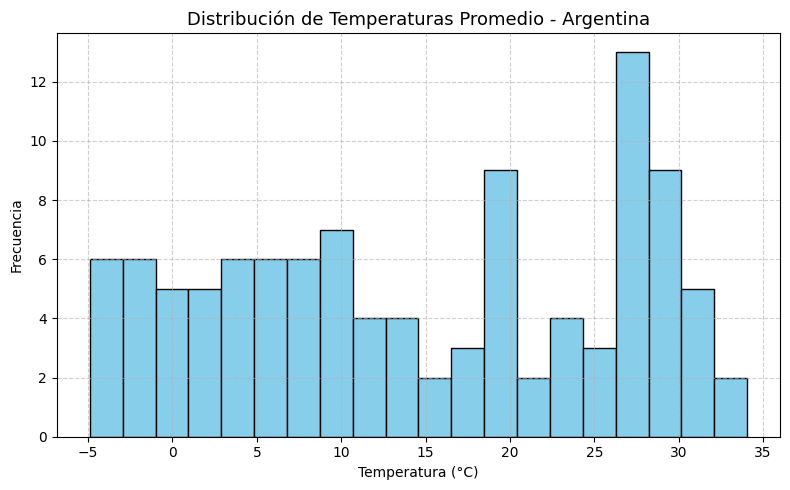

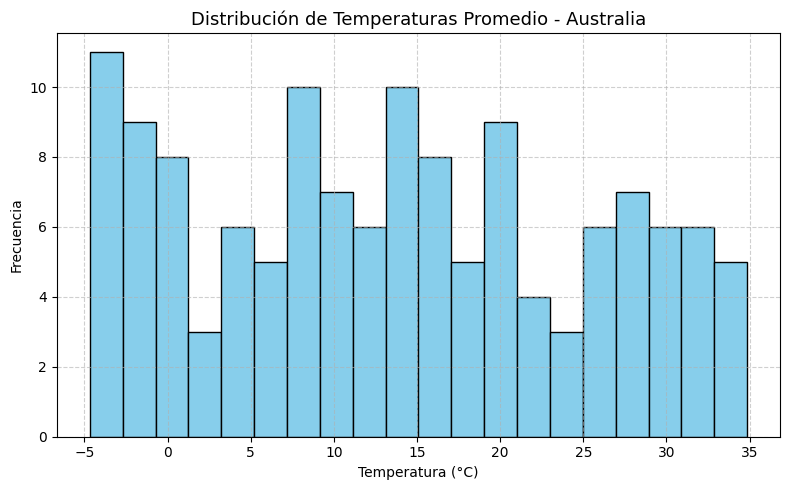

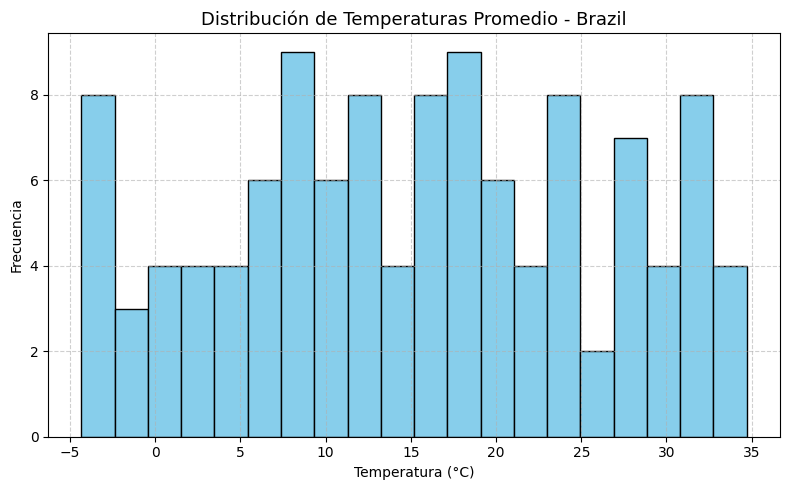

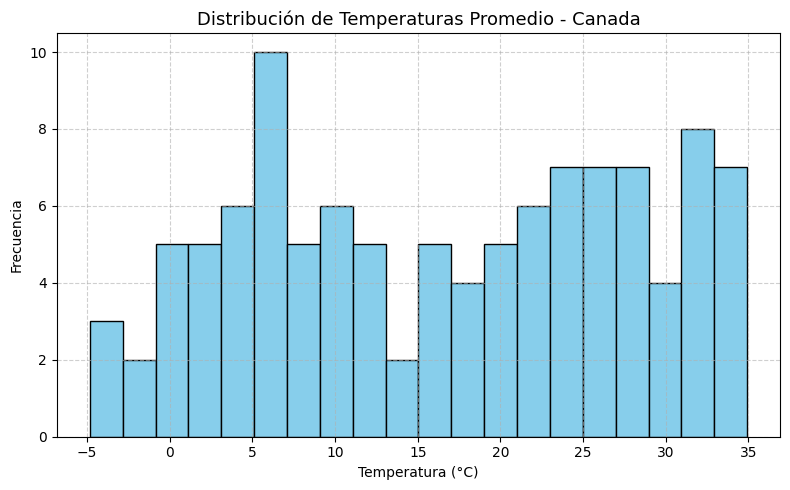

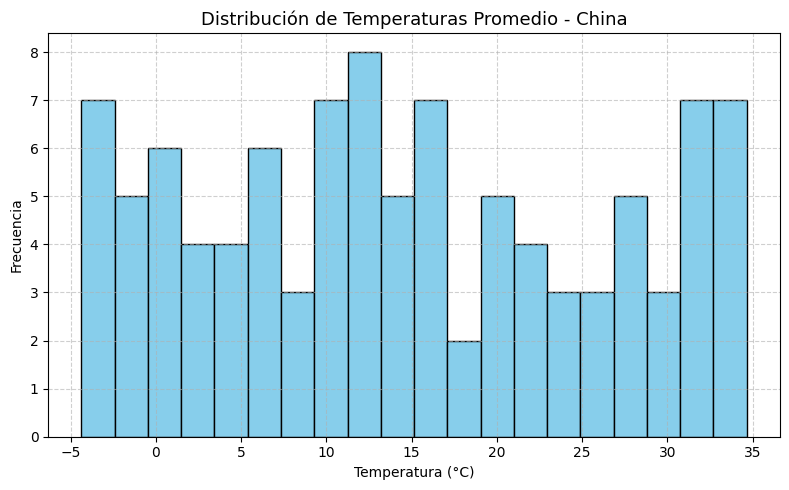

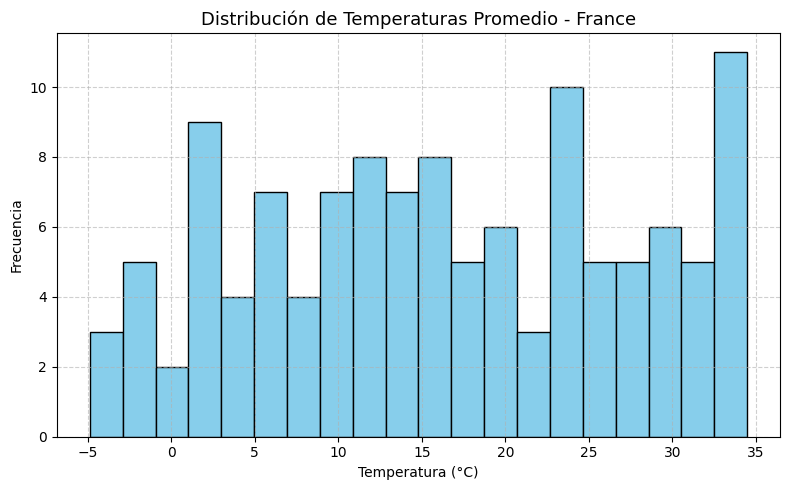

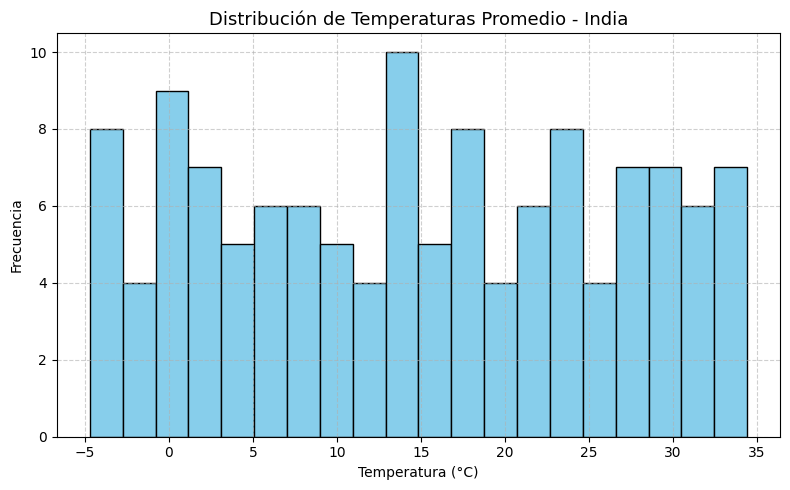

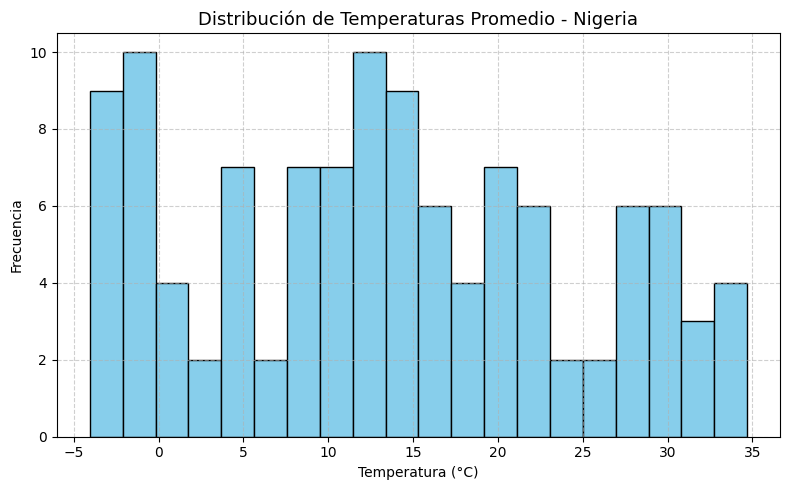

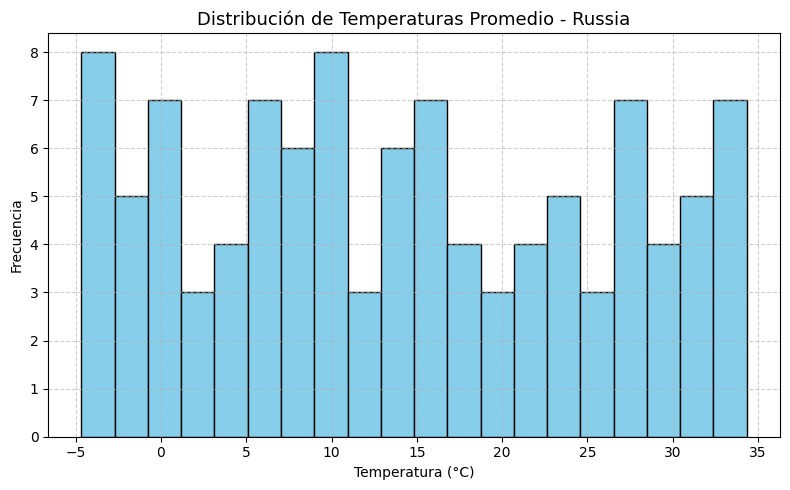

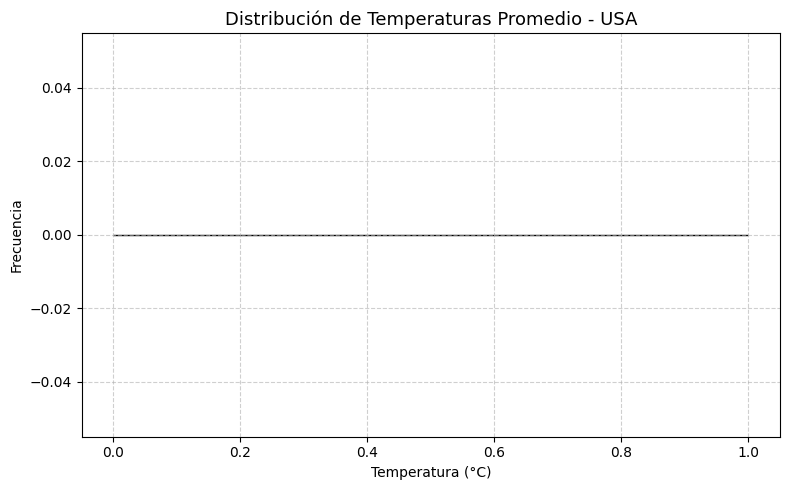

In [14]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}

for paises, data in paises.items():
    plt.figure(figsize=(8,5))
    plt.hist(data['average_temperature_c'], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de Temperaturas Promedio - {paises}', fontsize=13)
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()   

Temperatura Maxima por año (2020 - 2024)

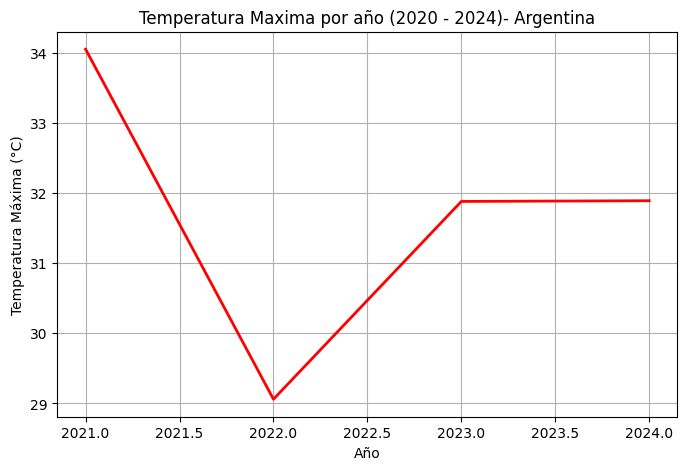

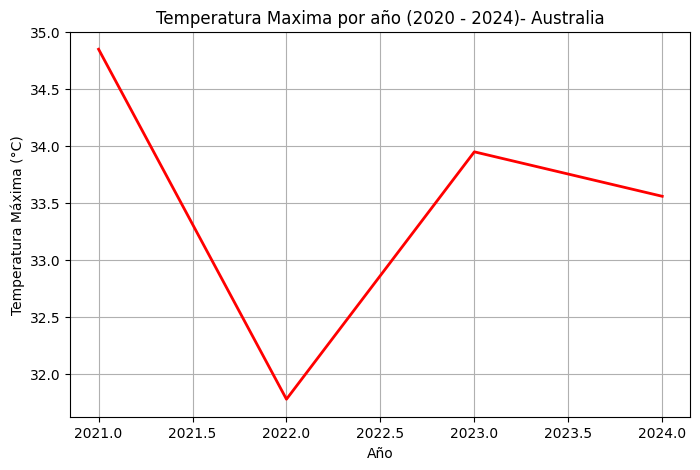

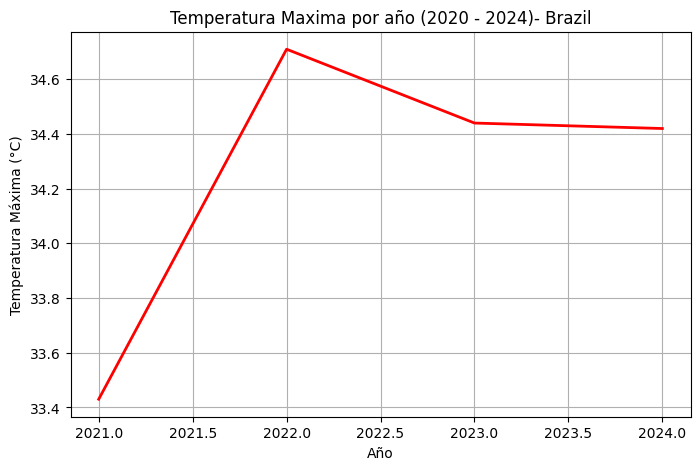

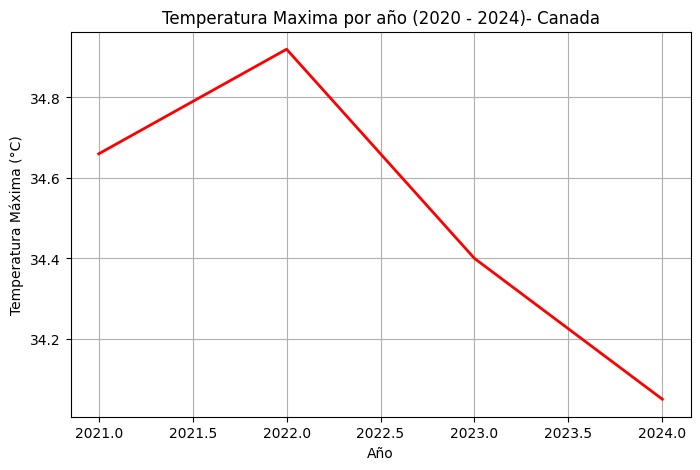

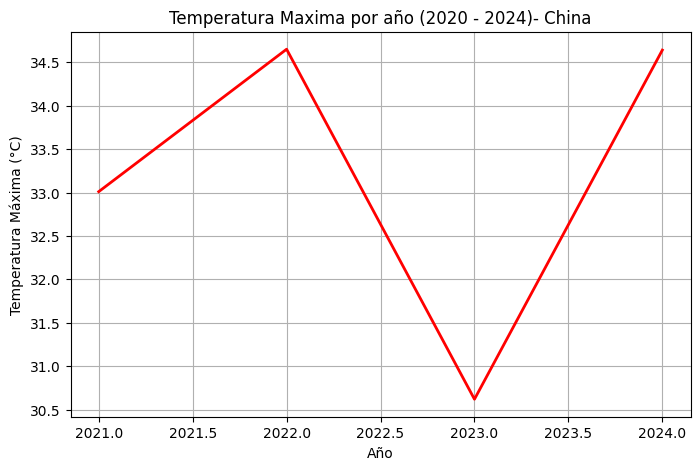

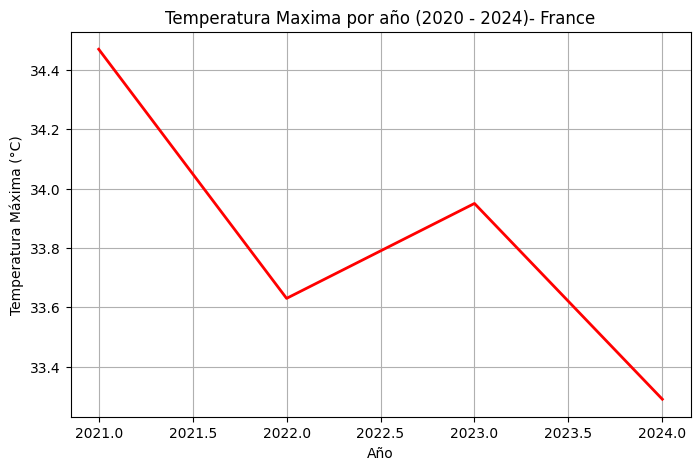

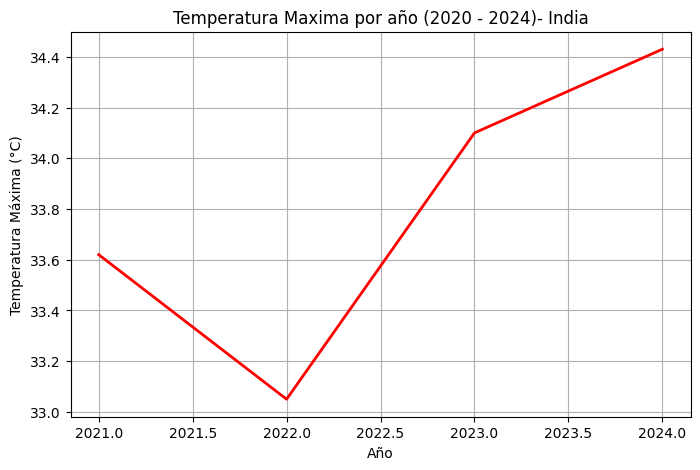

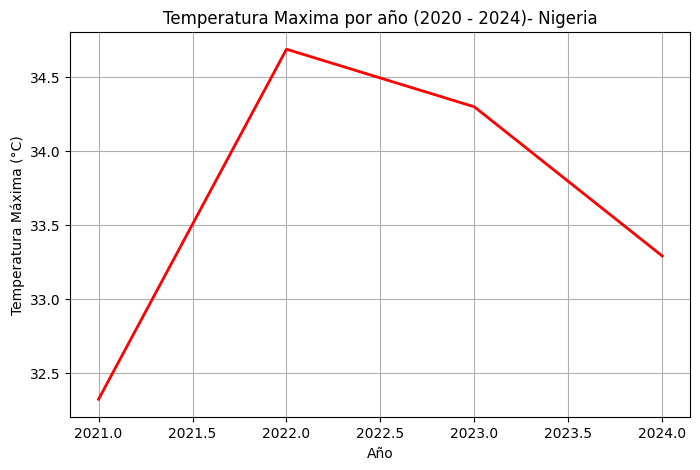

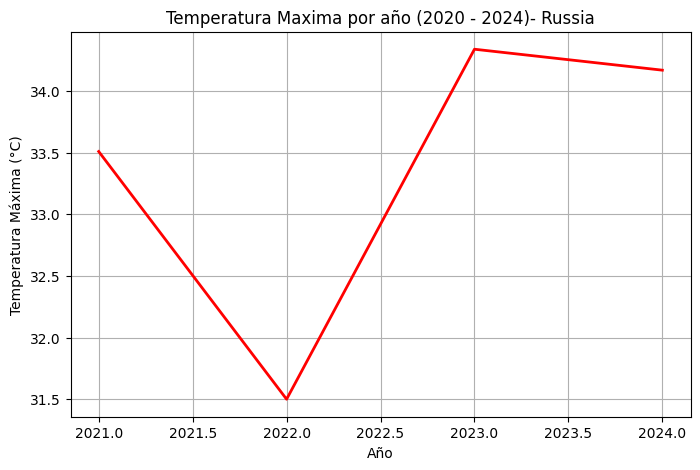

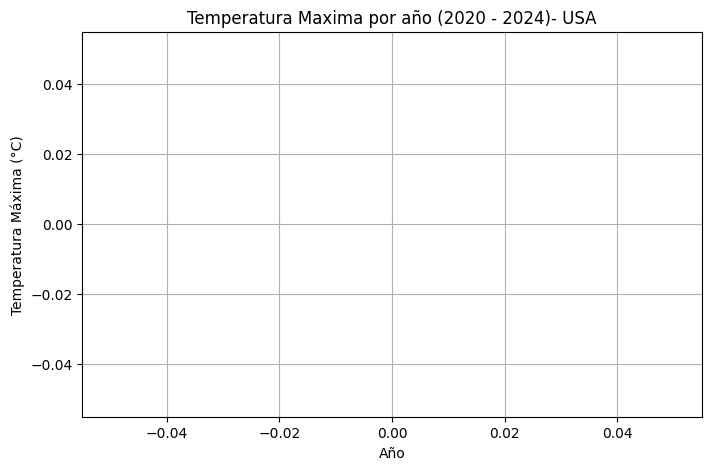

In [15]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}

for pais, data in paises.items():
    temp_max = data.groupby('year')['average_temperature_c'].max().reset_index()
    plt.figure(figsize=(8,5))
    plt.plot(temp_max['year'], temp_max['average_temperature_c'], color='red', linewidth=2)
    plt.title(f'Temperatura Maxima por año (2020 - 2024)- {pais}')
    plt.xlabel('Año')
    plt.ylabel('Temperatura Máxima (°C)')
    plt.grid(True)
    plt.show()

Precipitación total anual

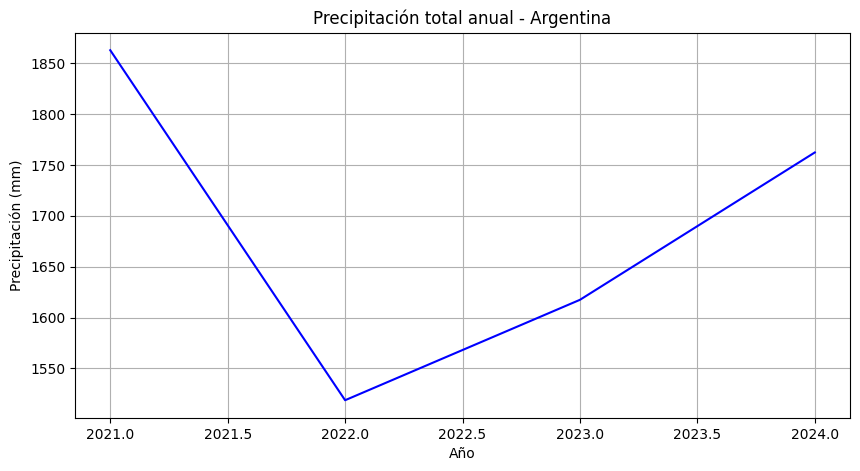

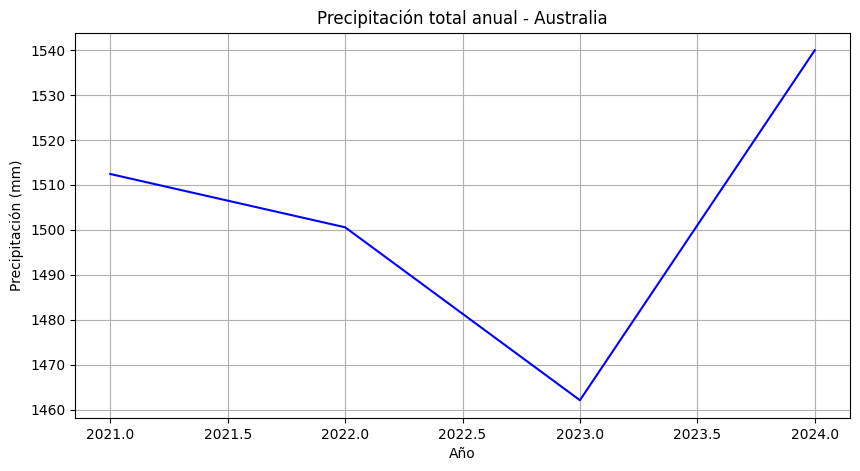

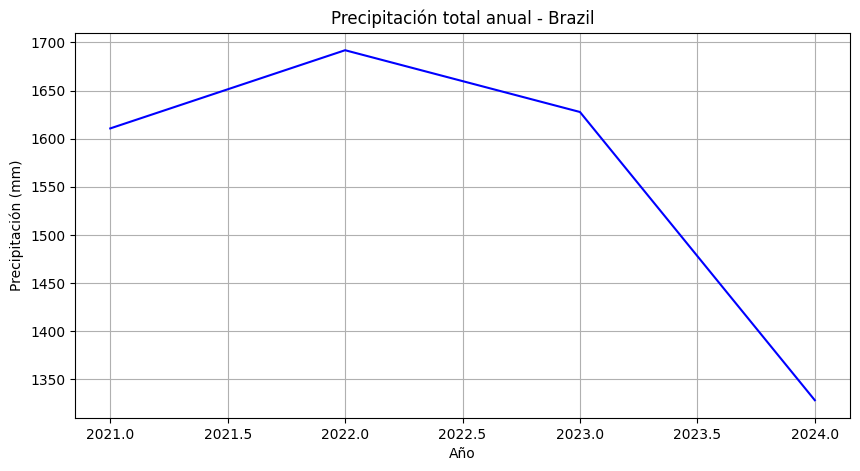

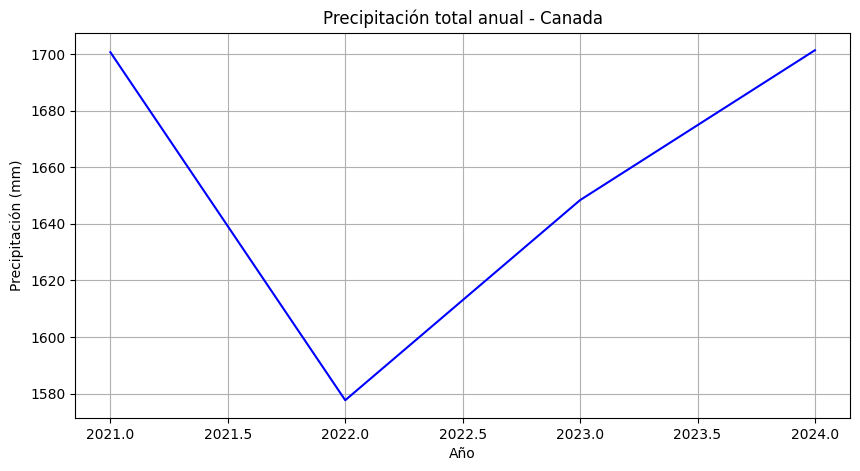

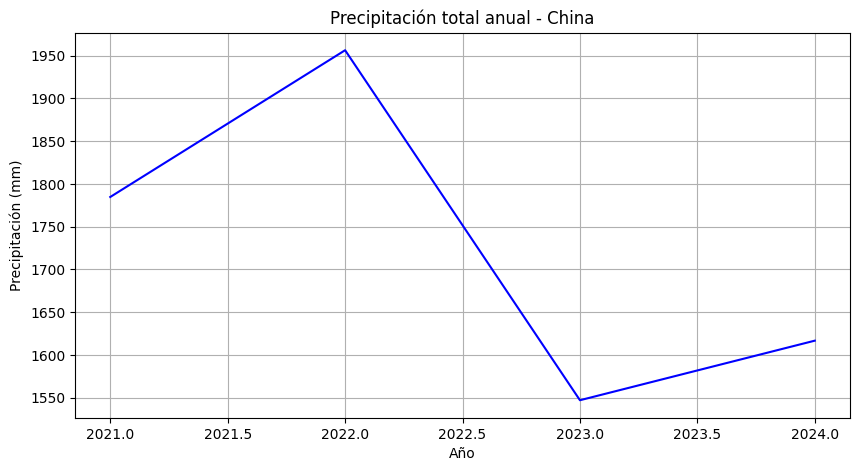

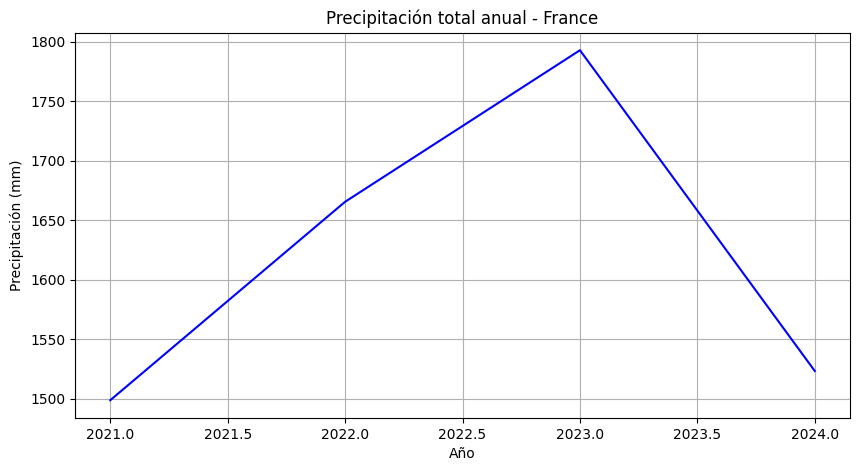

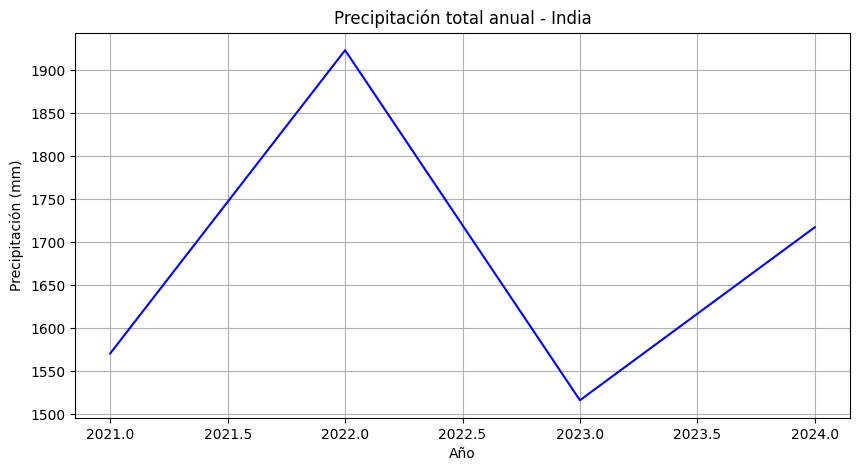

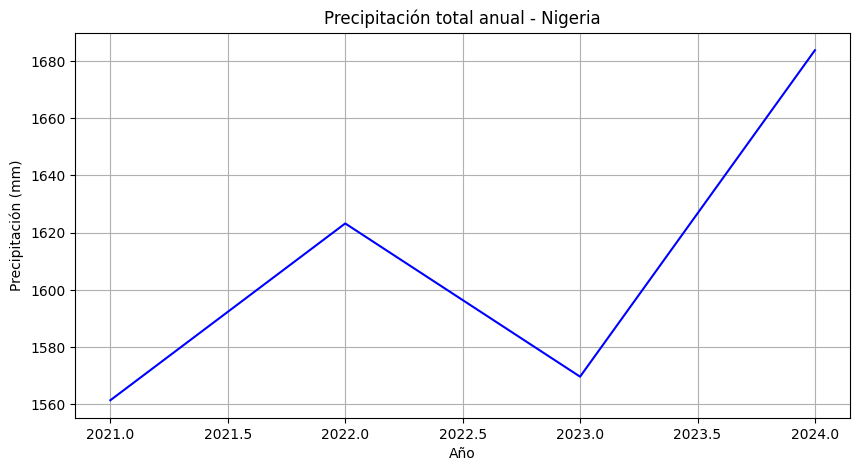

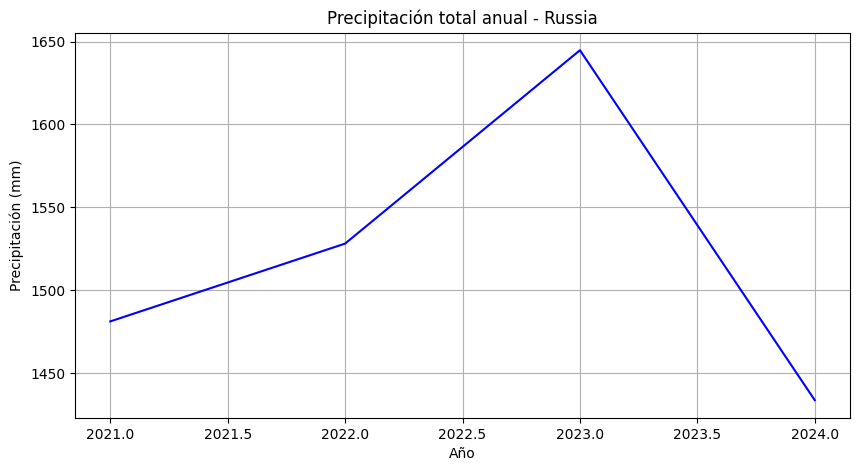

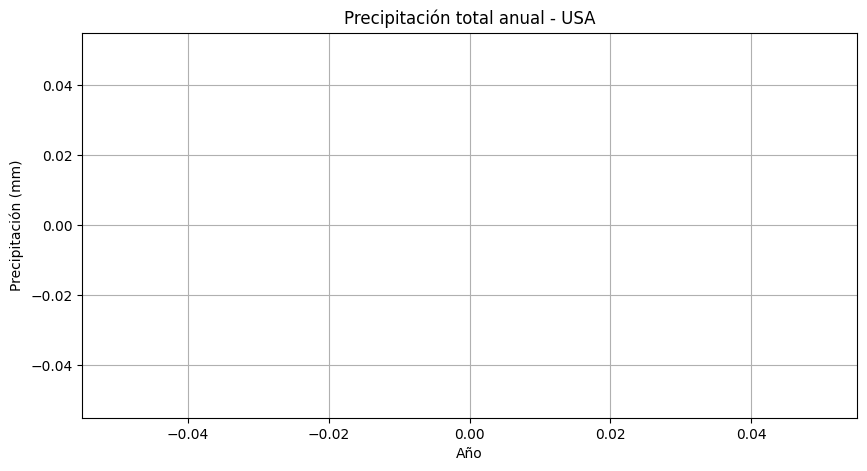

In [16]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}

for pais, data in paises.items():
    pre_mean = data.groupby('year')['total_precipitation_mm'].mean().reset_index()

    plt.figure(figsize=(10,5))
    plt.plot(pre_mean['year'], pre_mean['total_precipitation_mm'], color='blue')
    plt.title(f'Precipitación total anual - {pais}')
    plt.xlabel('Año')
    plt.ylabel('Precipitación (mm)')
    plt.grid(True)
    plt.show()

Relacion Temperatura vs Rendimiento

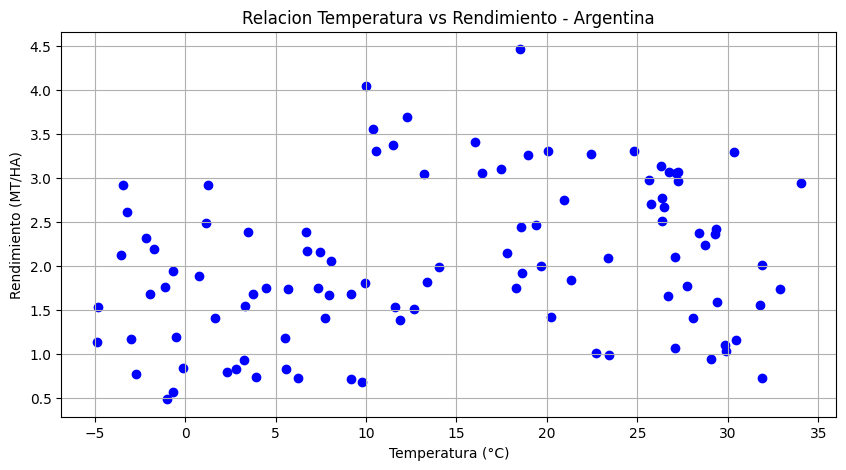

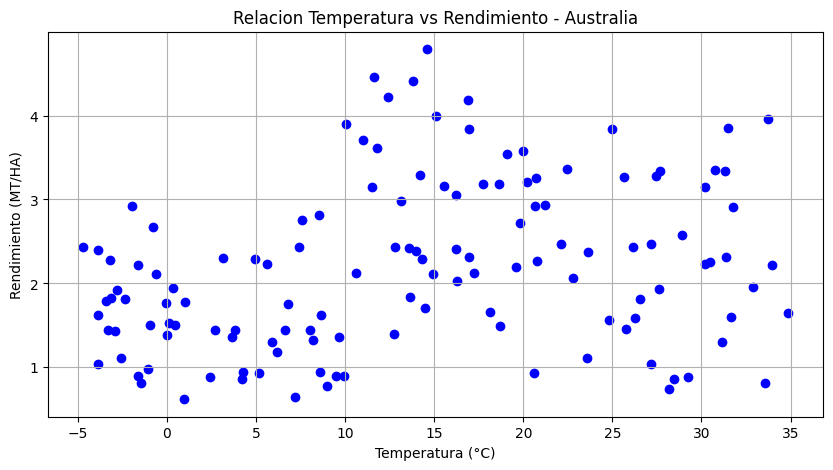

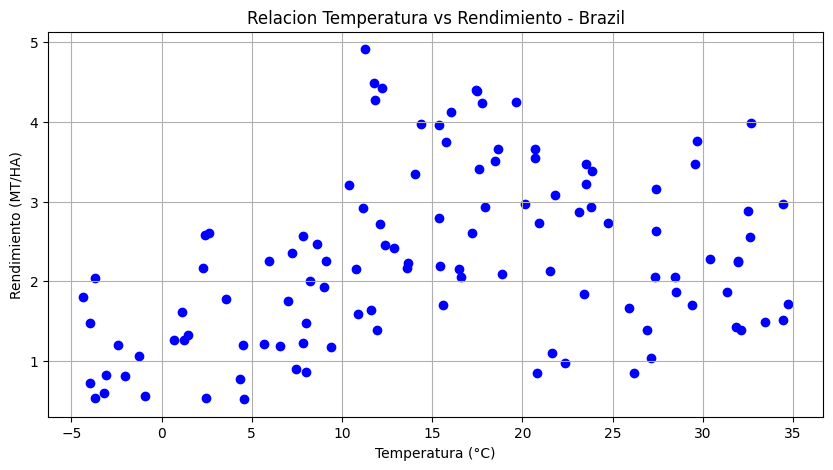

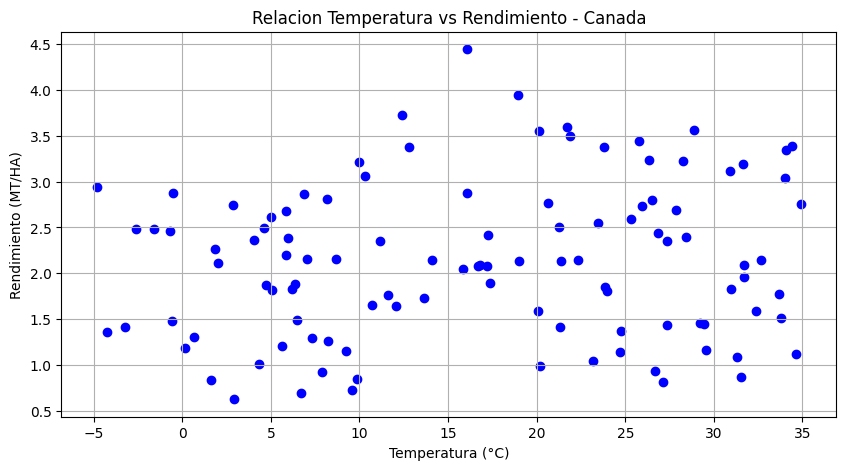

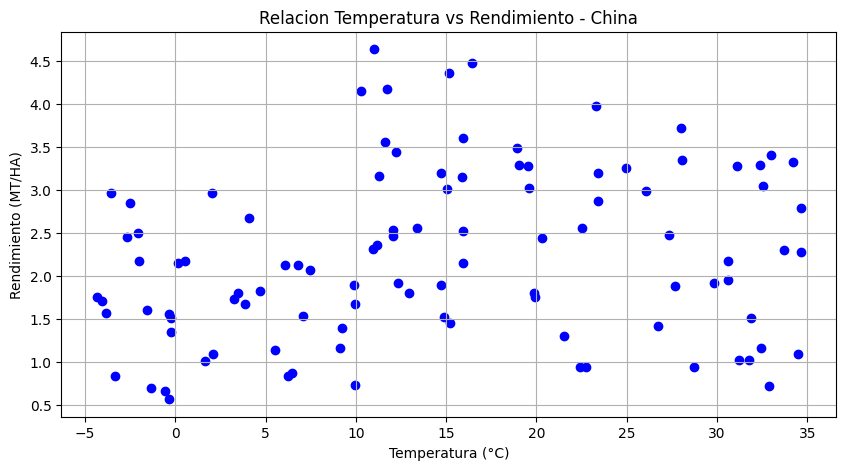

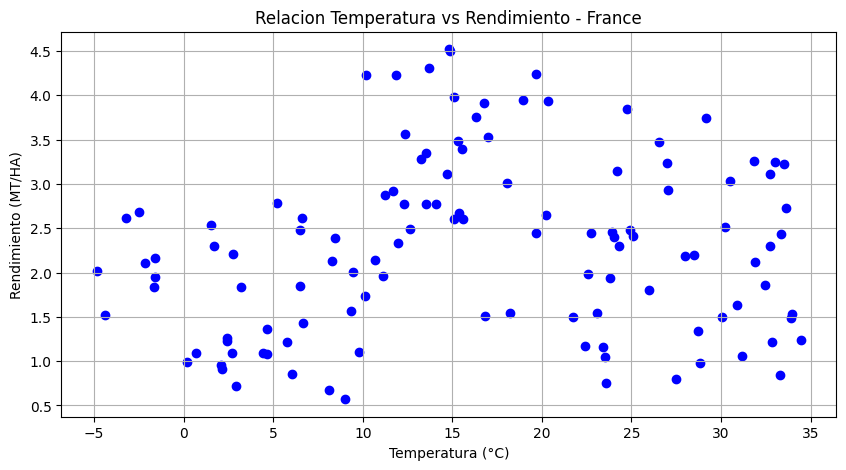

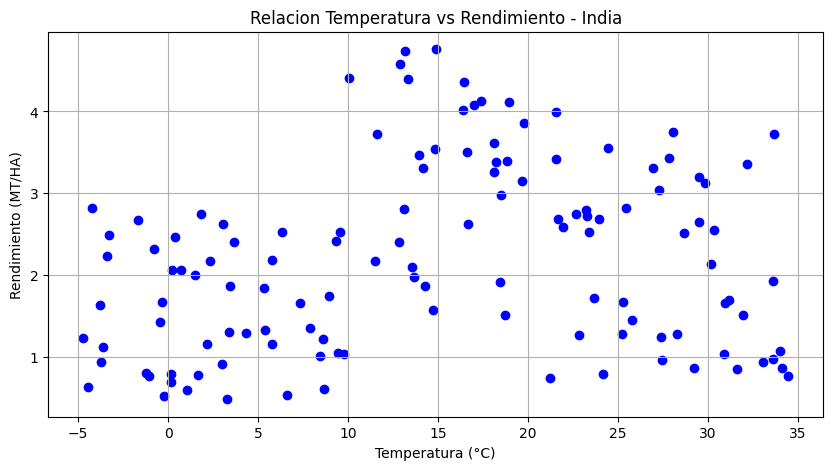

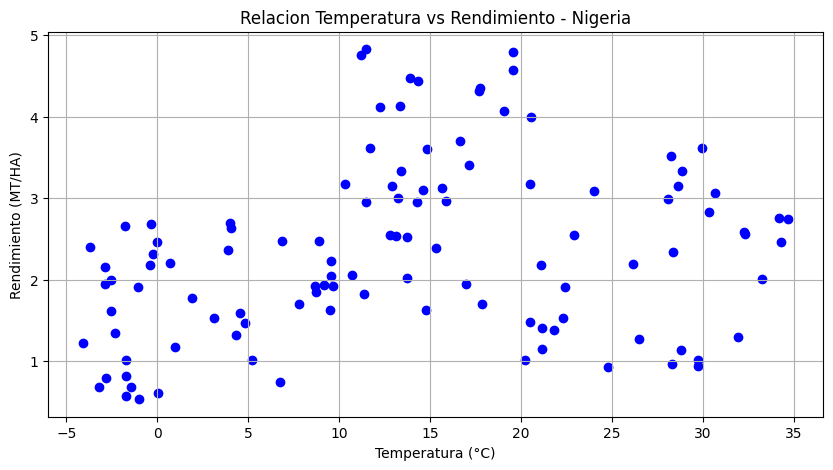

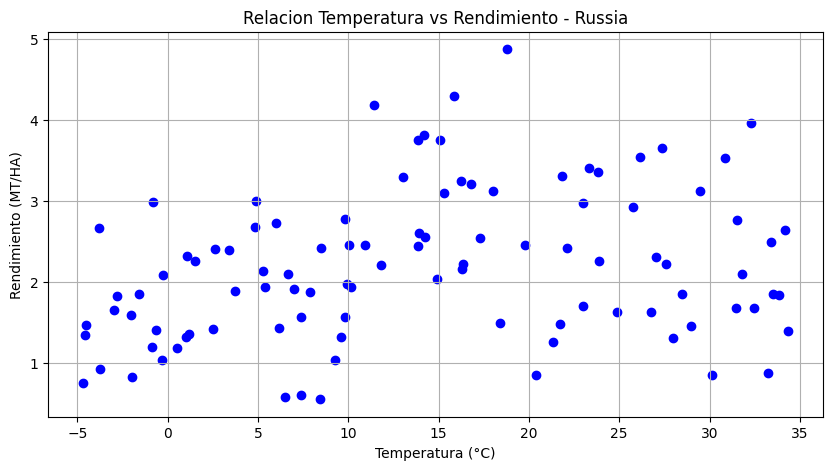

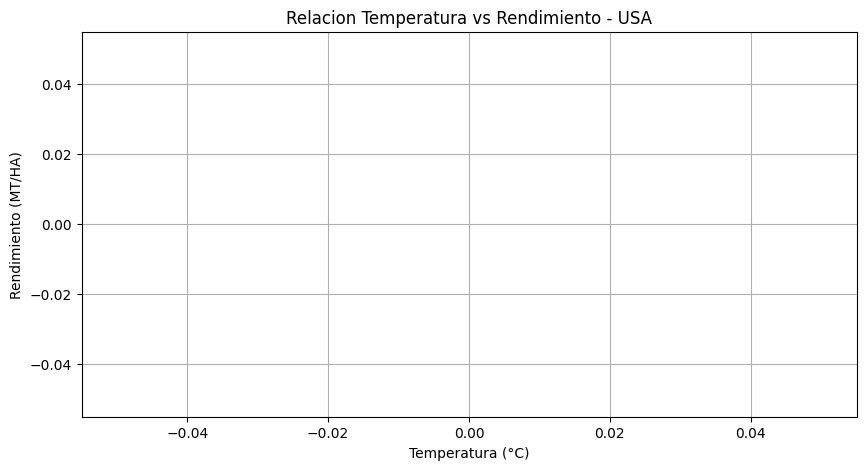

In [17]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}

for pais, data in paises.items():
    pre_mean = data.groupby('average_temperature_c')['crop_yield_mt_per_ha'].mean().reset_index()

    plt.figure(figsize=(10,5))
    plt.scatter(pre_mean['average_temperature_c'], pre_mean['crop_yield_mt_per_ha'], color='blue')
    plt.title(f'Relacion Temperatura vs Rendimiento - {pais}')
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Rendimiento (MT/HA)')
    plt.grid(True)
    plt.show()

Relacion Acceso al Riesgo vs Rendimiento

<Figure size 1200x600 with 0 Axes>

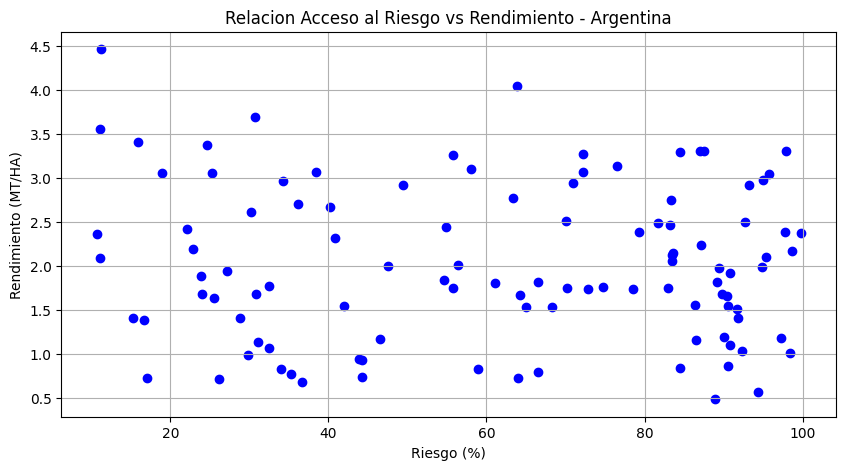

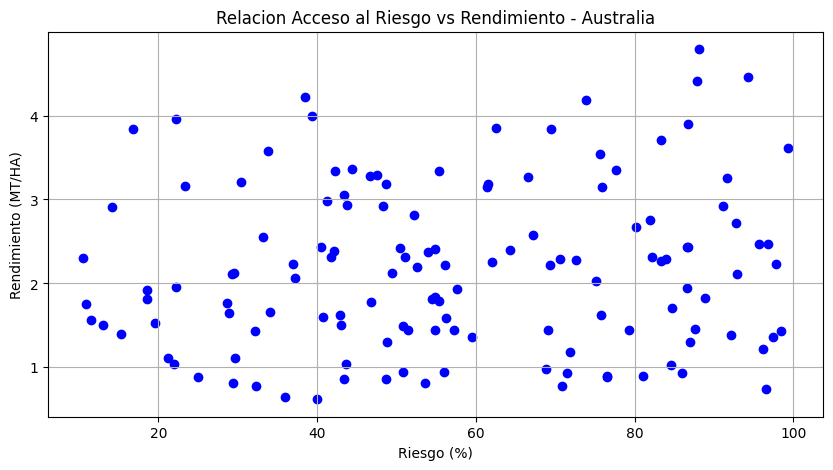

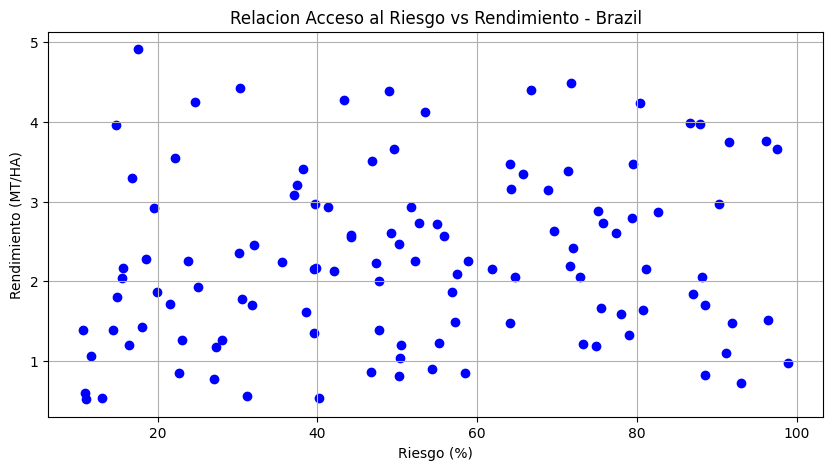

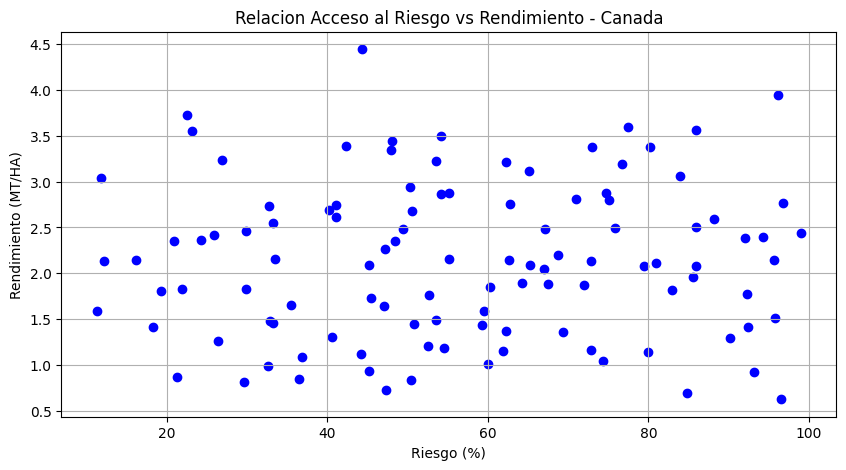

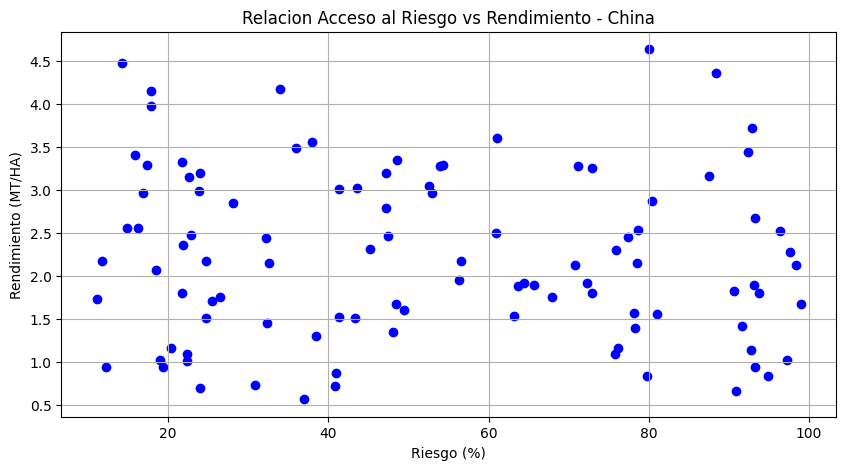

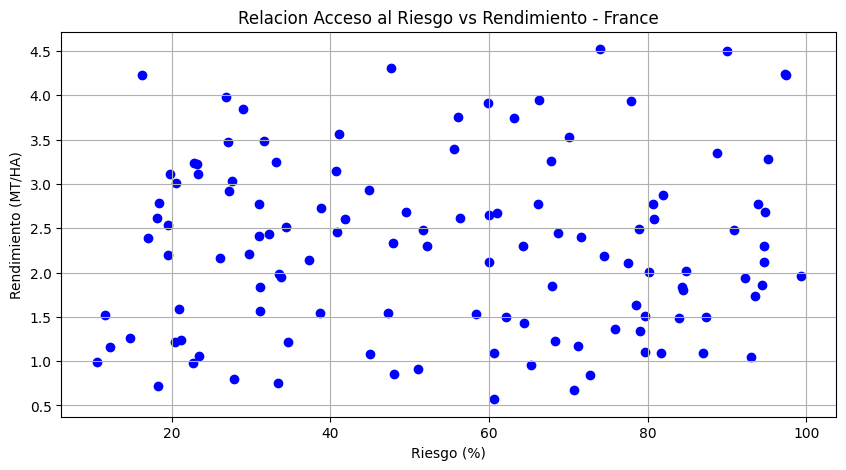

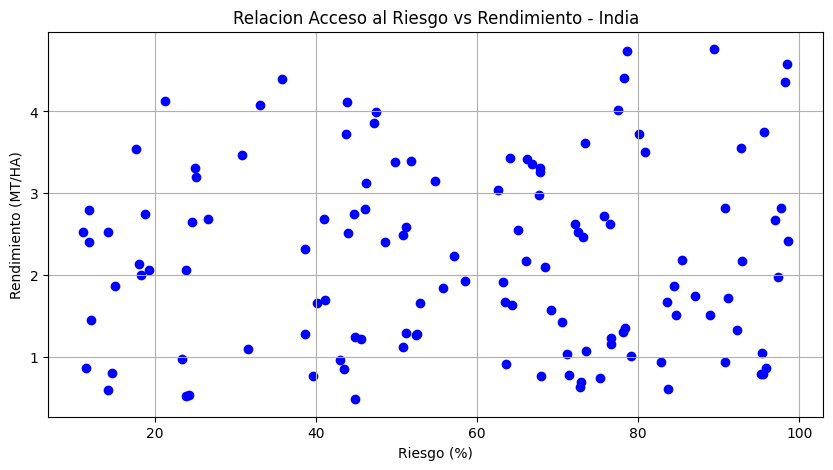

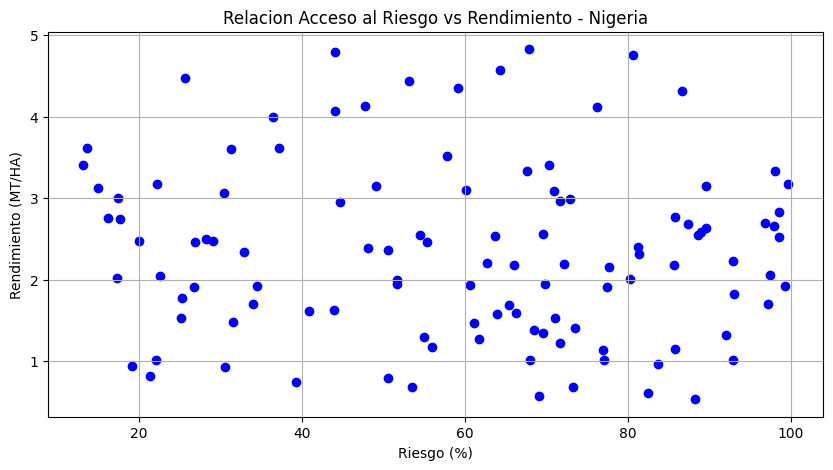

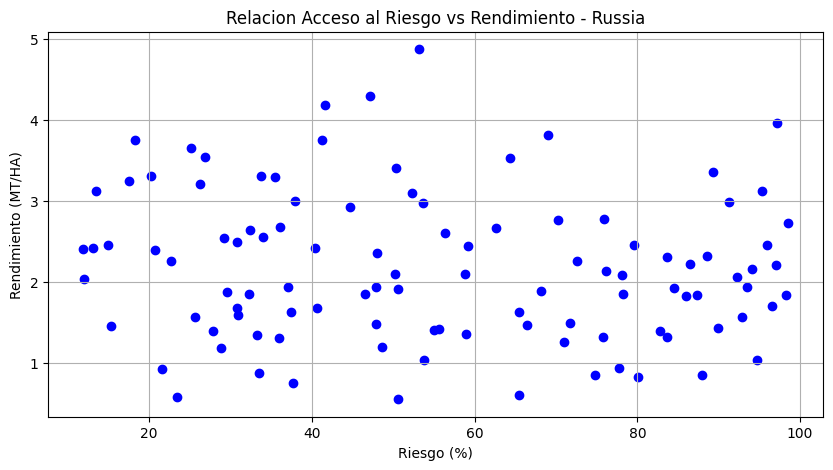

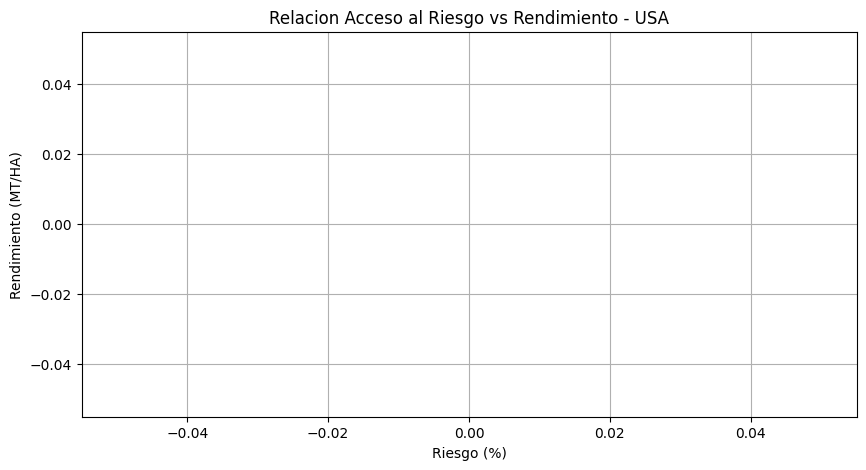

In [18]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}
plt.figure(figsize=(12, 6))

for pais, data in paises.items():
    pre_mean = data.groupby('irrigation_access_%')['crop_yield_mt_per_ha'].mean().reset_index()
    
    plt.figure(figsize=(10,5))
    plt.scatter(pre_mean['irrigation_access_%'], pre_mean['crop_yield_mt_per_ha'], color='blue')
    plt.title(f'Relacion Acceso al Riesgo vs Rendimiento - {pais}')
    plt.xlabel('Riesgo (%)')
    plt.ylabel('Rendimiento (MT/HA)')
    plt.grid(True)
    plt.show()

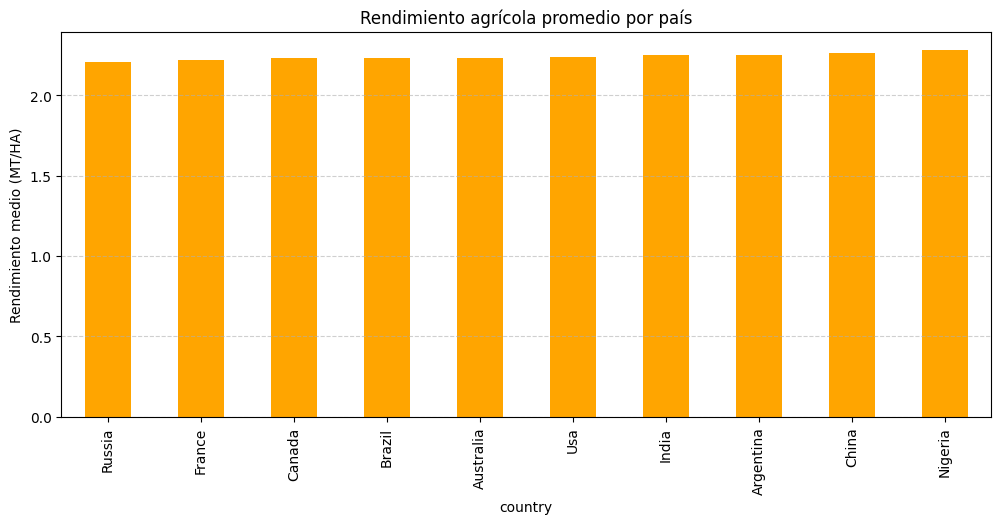

In [19]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}
df_mean_yield = df.groupby('country')['crop_yield_mt_per_ha'].mean().sort_values()
df_mean_yield.plot(kind='bar', figsize=(12,5), color='orange')
plt.title('Rendimiento agrícola promedio por país')
plt.ylabel('Rendimiento medio (MT/HA)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


Promedio Co2 vs Rendimiento

<Figure size 1200x600 with 0 Axes>

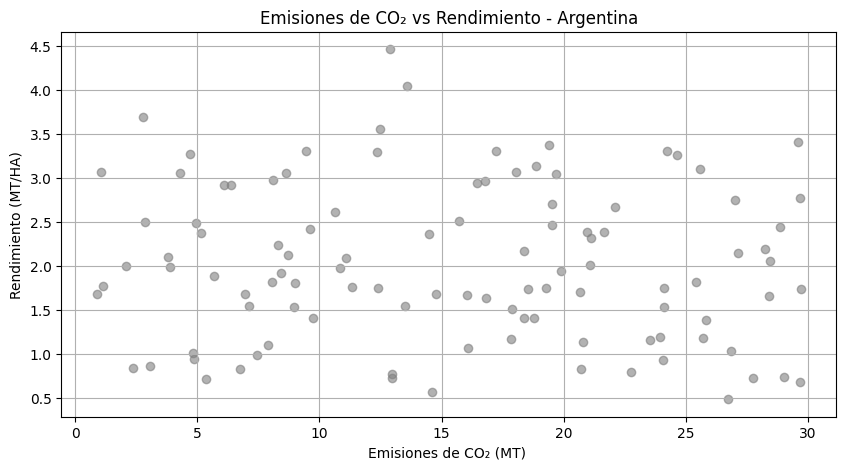

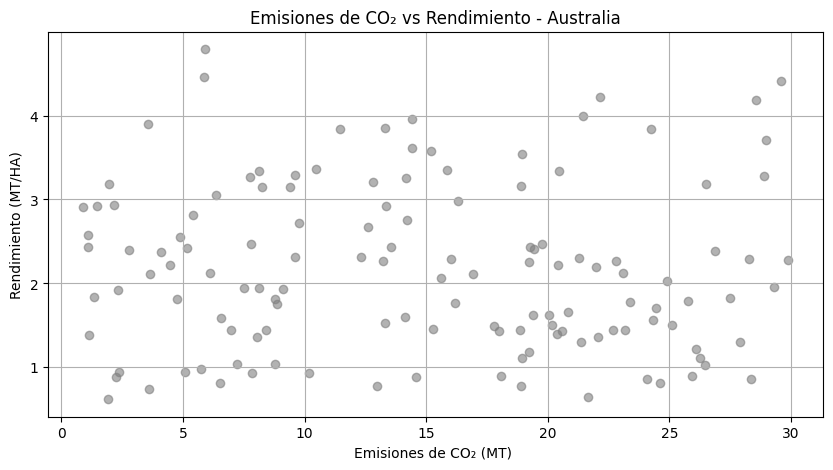

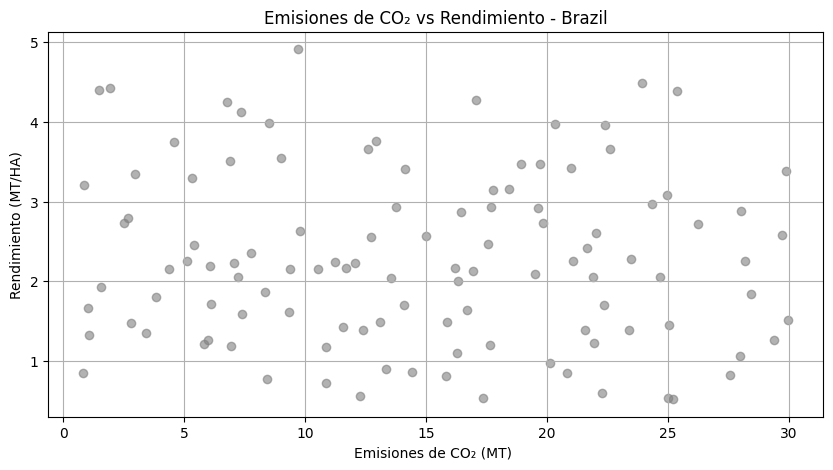

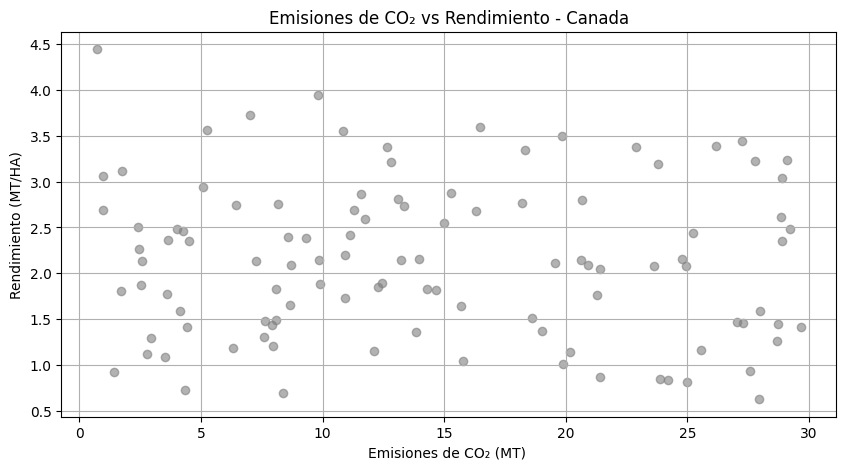

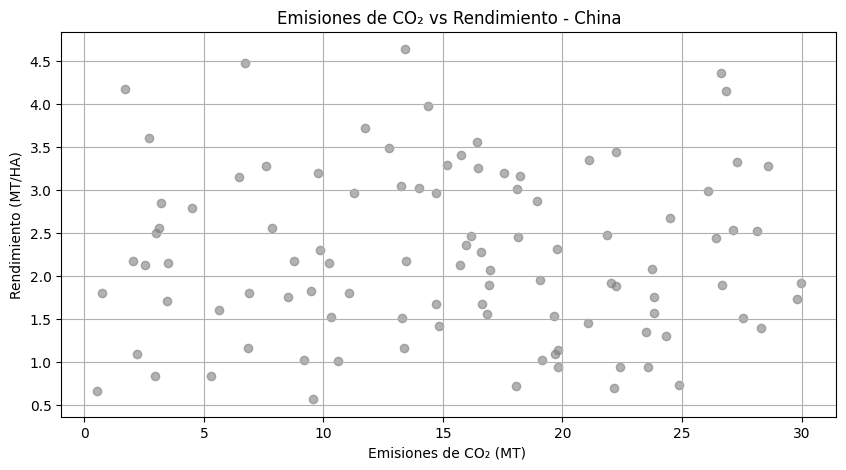

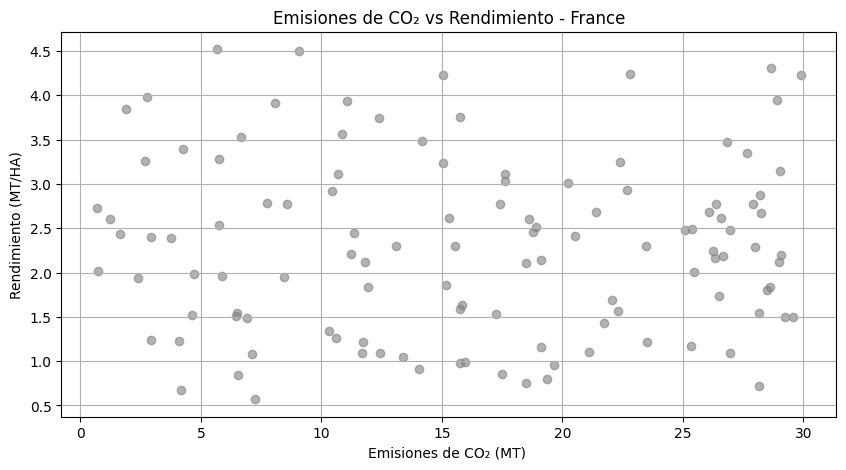

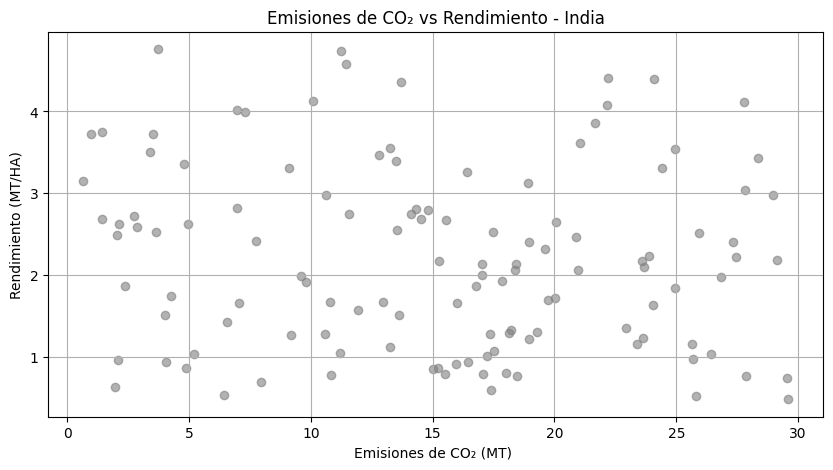

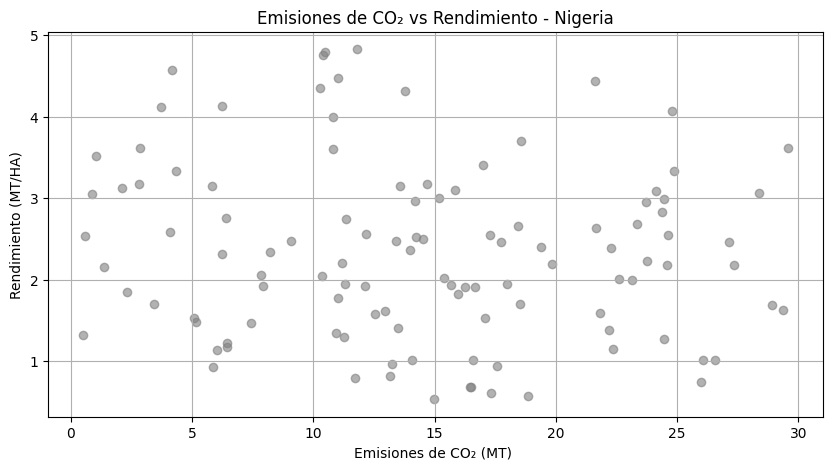

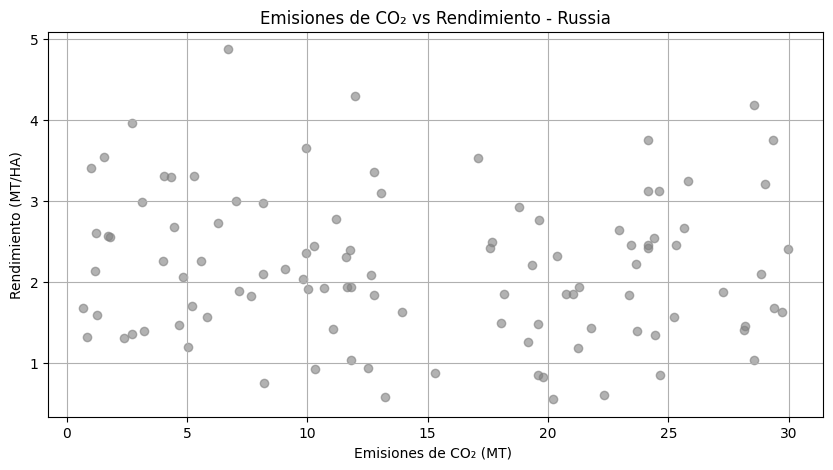

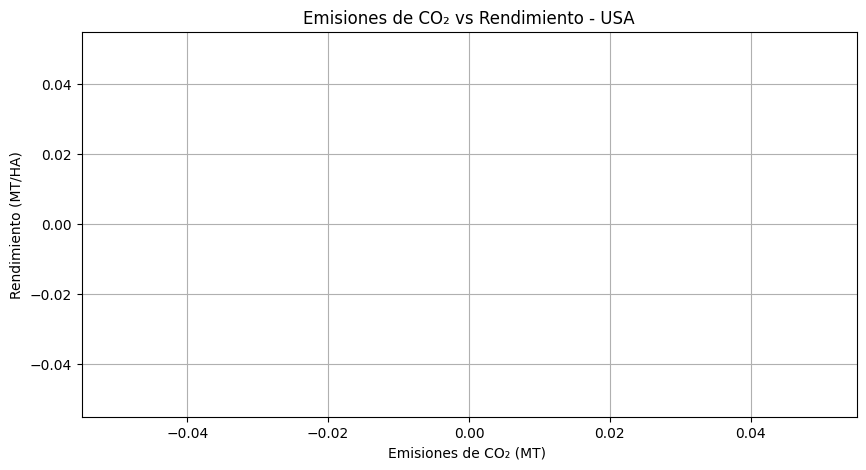

In [20]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}
plt.figure(figsize=(12, 6))

for pais, data in paises.items():
    pre_mean = data.groupby('co2_emissions_mt')['crop_yield_mt_per_ha'].mean().reset_index()
    
    plt.figure(figsize=(10,5))
    plt.scatter(pre_mean['co2_emissions_mt'], pre_mean['crop_yield_mt_per_ha'], alpha=0.6, color='gray')
    plt.title(f'Emisiones de CO₂ vs Rendimiento - {pais}')
    plt.xlabel('Emisiones de CO₂ (MT) ')
    plt.ylabel('Rendimiento (MT/HA)')
    plt.grid(True)
    plt.show()

Fertilizante vs Rendimiento

<Figure size 1200x600 with 0 Axes>

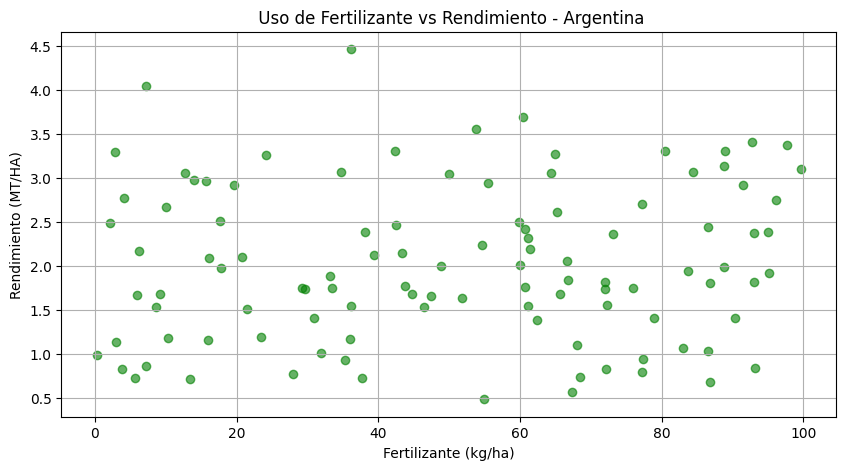

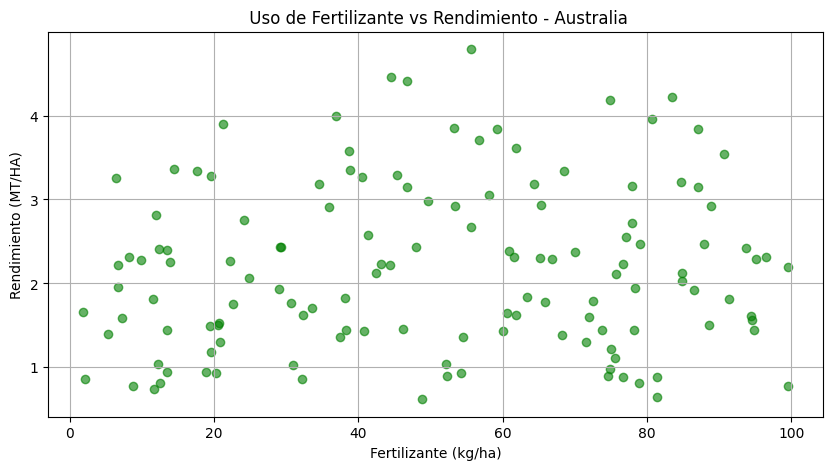

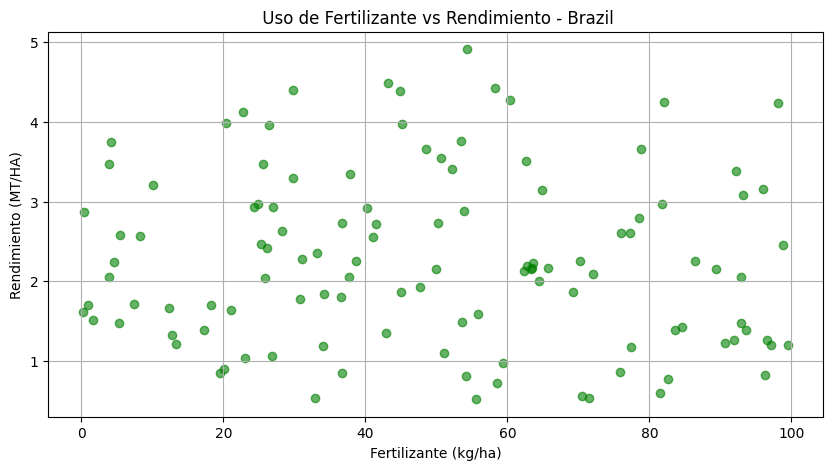

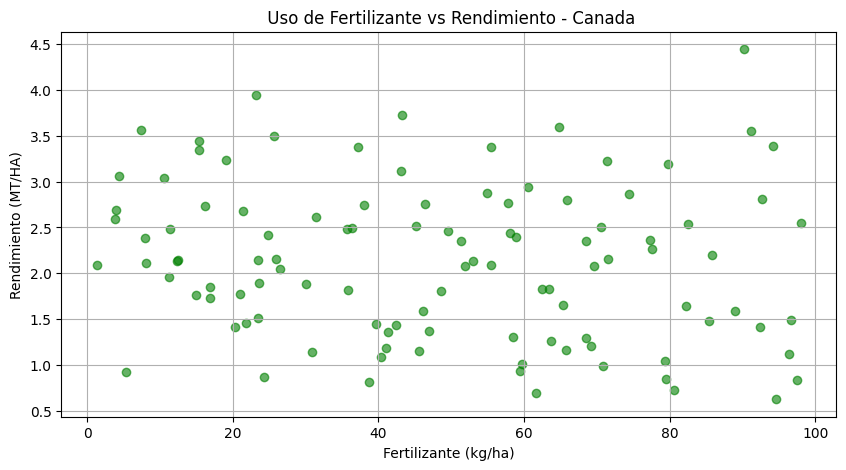

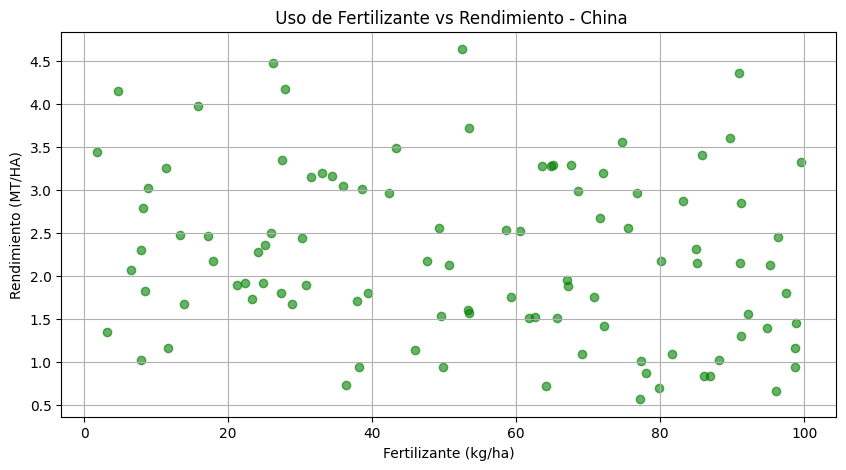

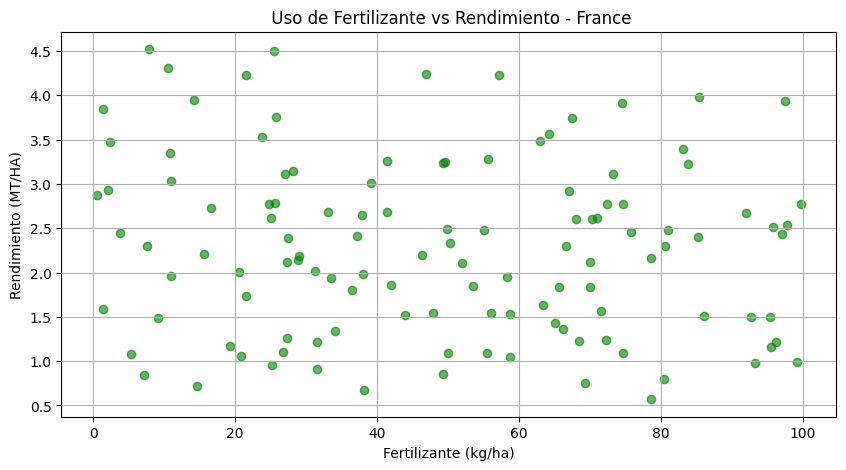

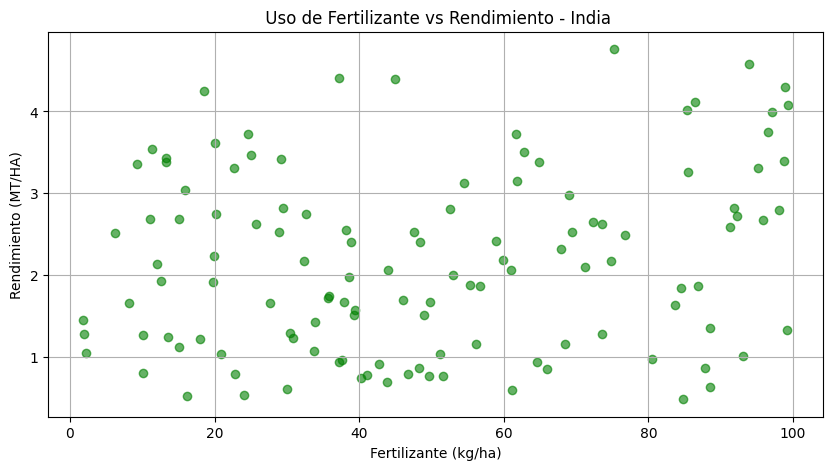

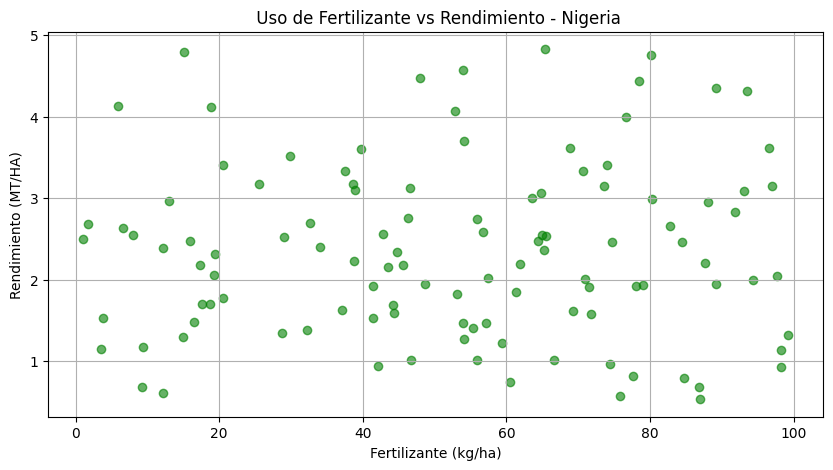

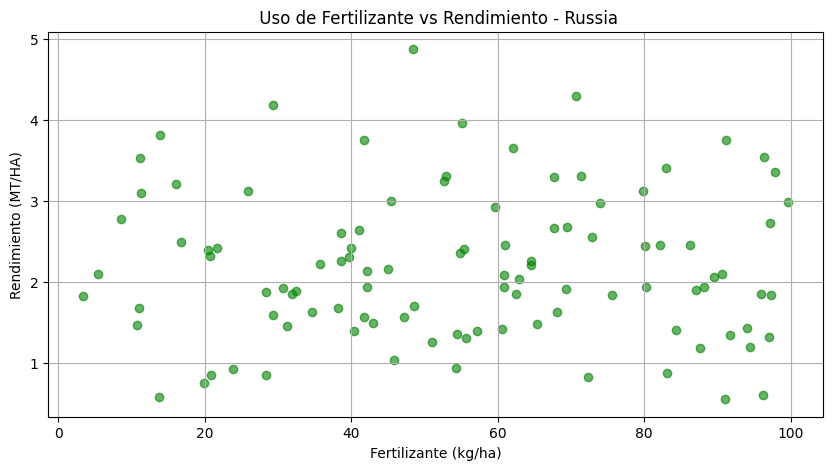

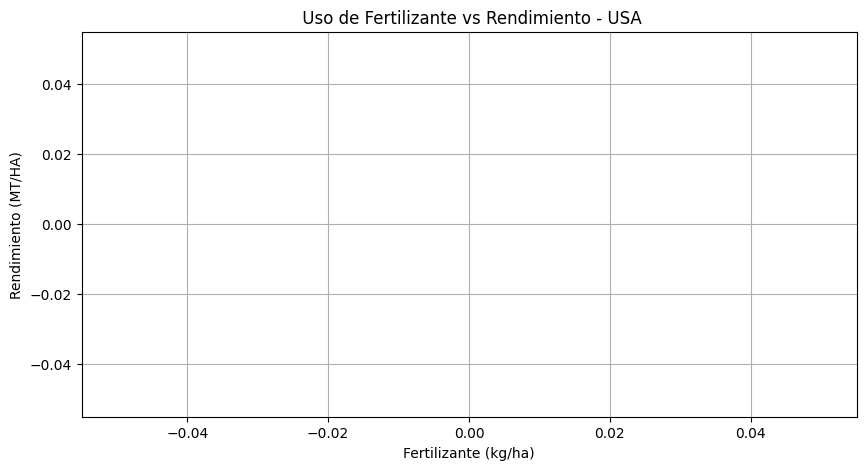

In [21]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}
plt.figure(figsize=(12, 6))

for pais, data in paises.items():
    pre_mean = data.groupby('fertilizer_use_kg_per_ha')['crop_yield_mt_per_ha'].mean().reset_index()
    
    plt.figure(figsize=(10,5))
    plt.scatter(pre_mean['fertilizer_use_kg_per_ha'], pre_mean['crop_yield_mt_per_ha'], alpha=0.6, color='green')
    plt.title(f' Uso de Fertilizante vs Rendimiento - {pais}')
    plt.xlabel('Fertilizante (kg/ha)')
    plt.ylabel('Rendimiento (MT/HA)')
    plt.grid(True)
    plt.show()

Pesticidas vs Salud del Suelo

<Figure size 1200x600 with 0 Axes>

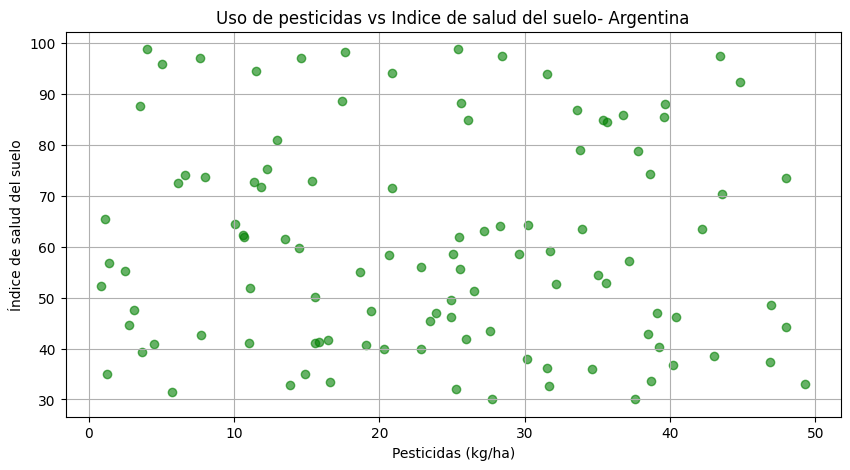

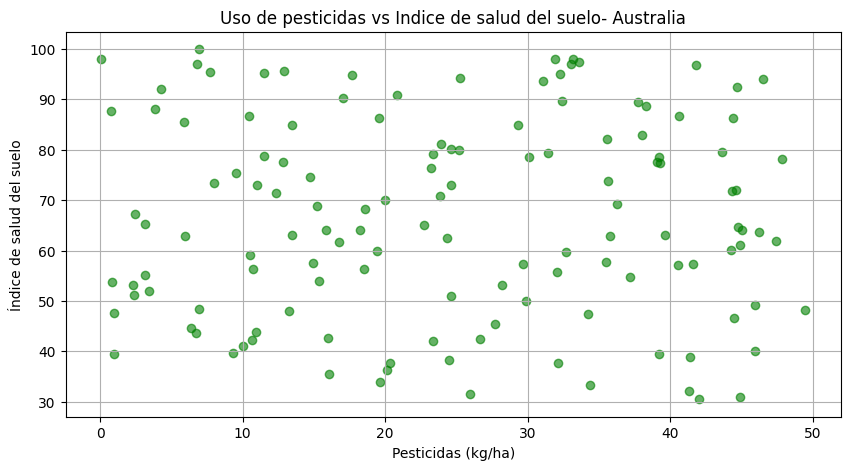

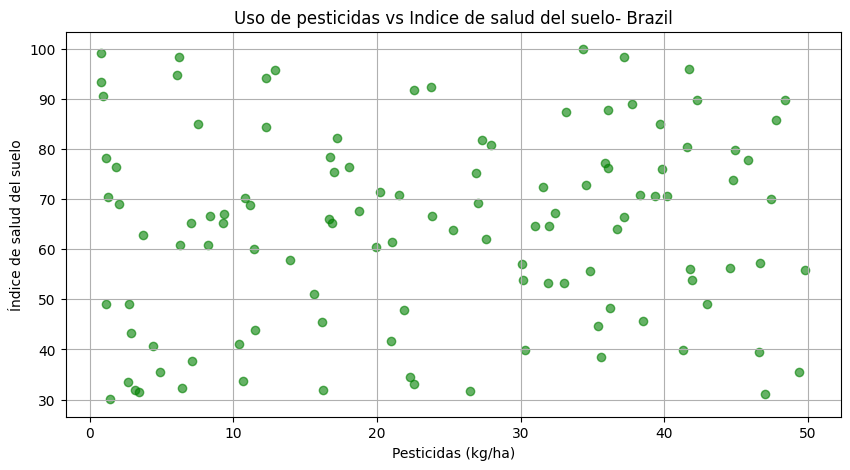

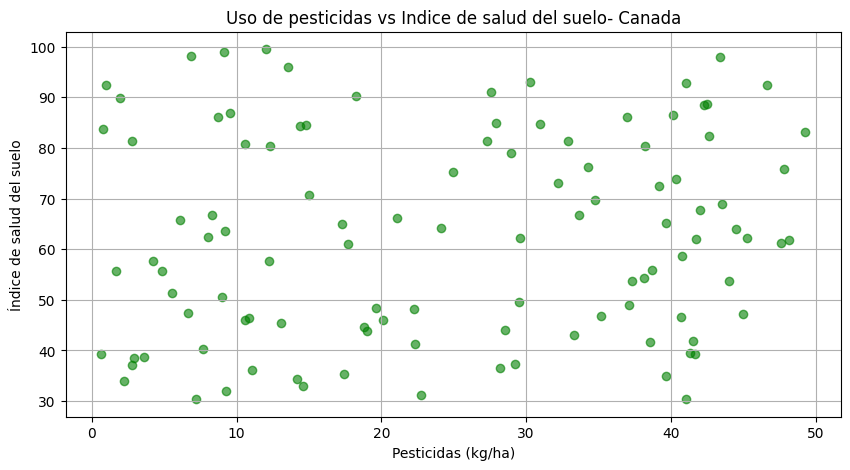

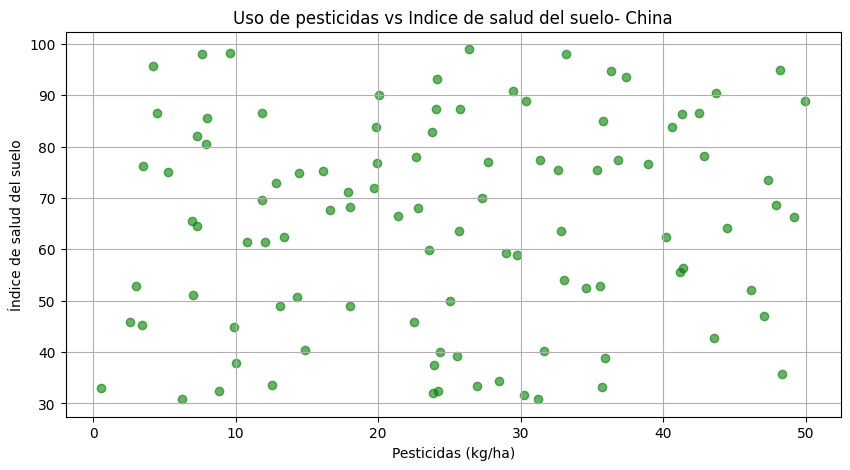

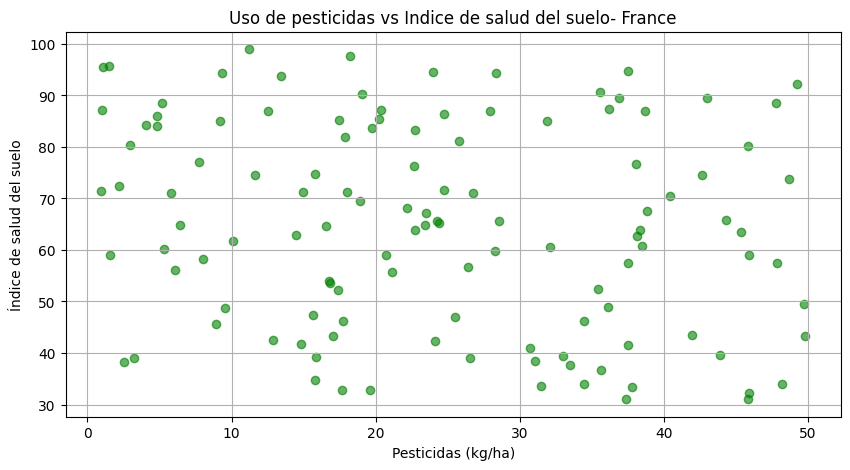

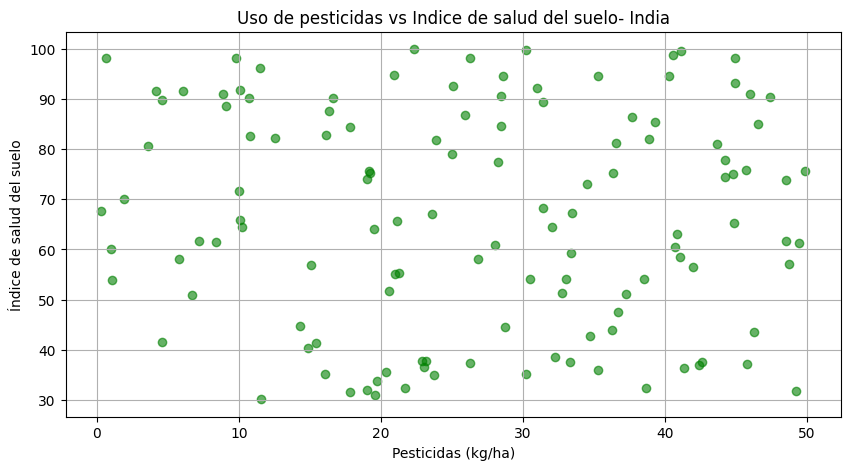

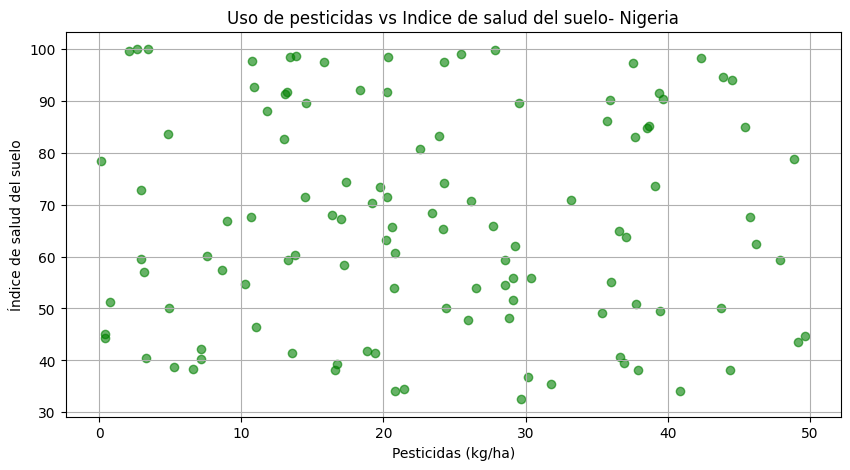

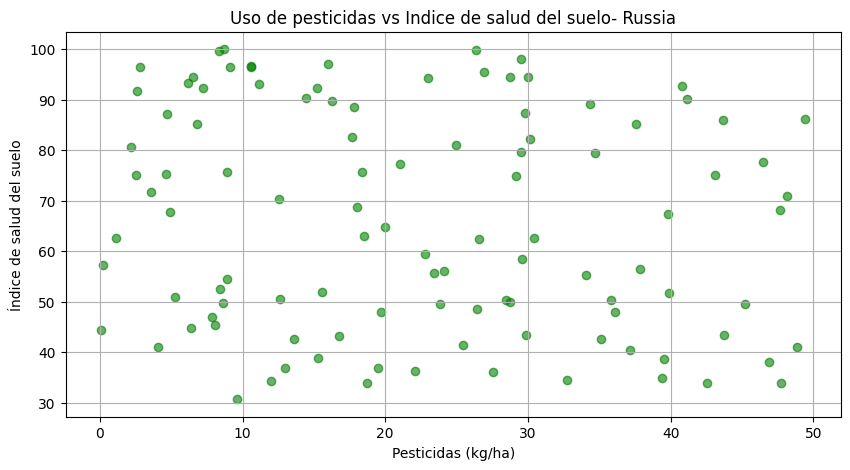

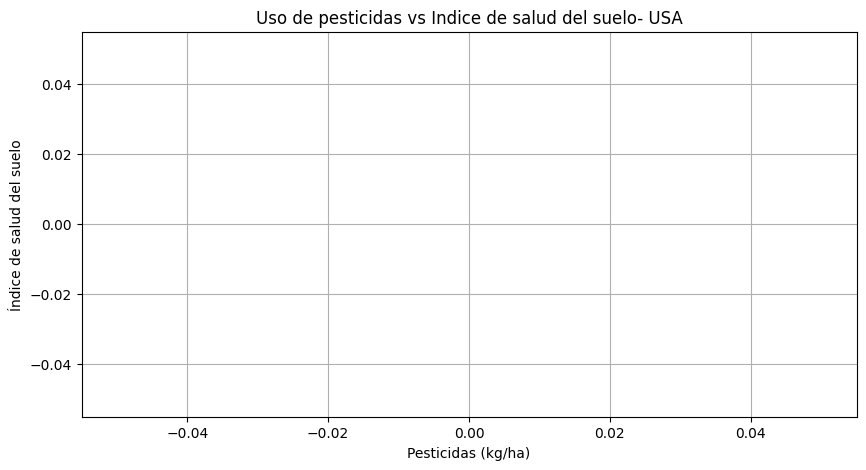

In [22]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}
plt.figure(figsize=(12, 6))

for pais, data in paises.items():
    pre_mean = data.groupby('pesticide_use_kg_per_ha')['soil_health_index'].mean().reset_index()
    
    plt.figure(figsize=(10,5))
    plt.scatter(pre_mean['pesticide_use_kg_per_ha'], pre_mean['soil_health_index'], alpha=0.6, color='green')
    plt.title(f'Uso de pesticidas vs Indice de salud del suelo- {pais}')
    plt.xlabel('Pesticidas (kg/ha)')
    plt.ylabel('Índice de salud del suelo')
    plt.grid(True)
    plt.show()

Impacto económico a lo largo del tiempo

<Figure size 1200x600 with 0 Axes>

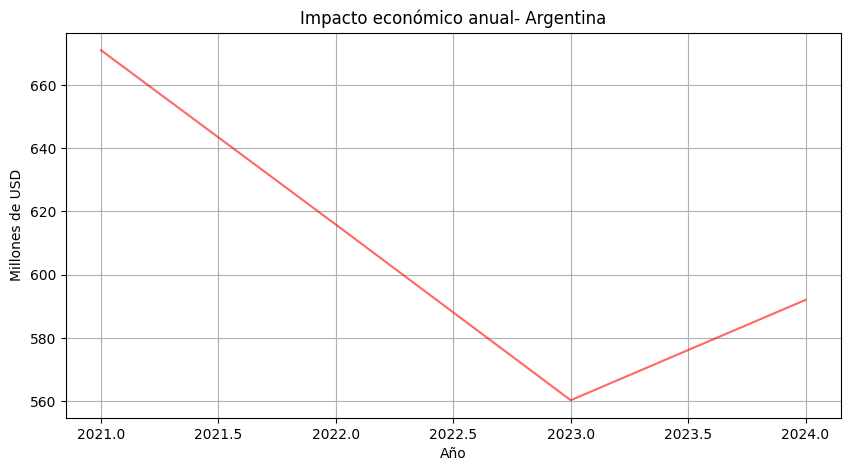

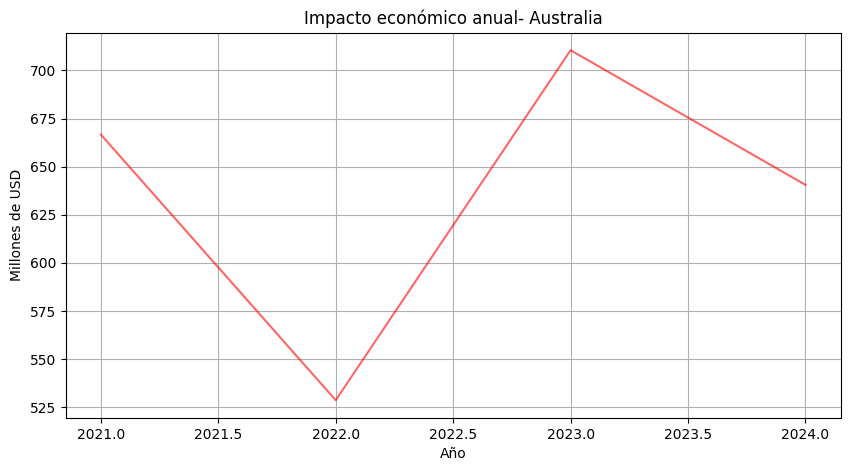

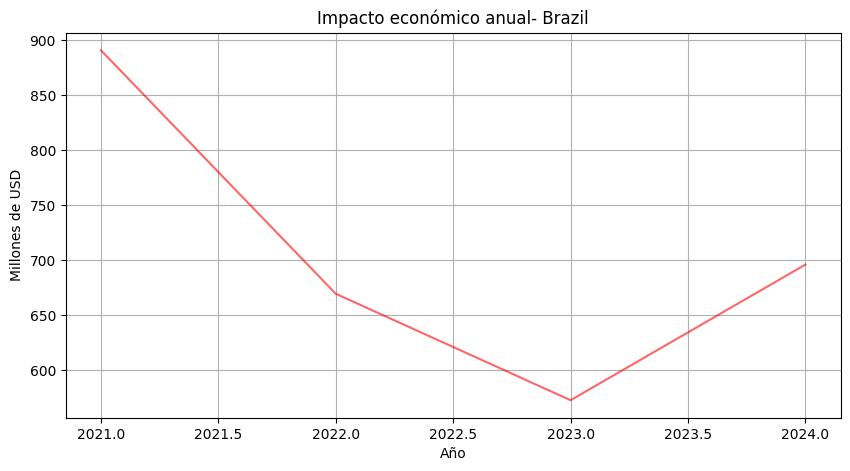

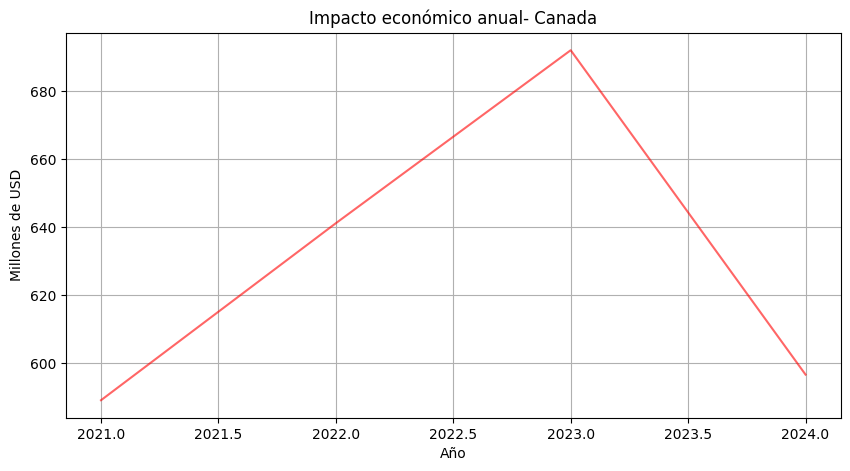

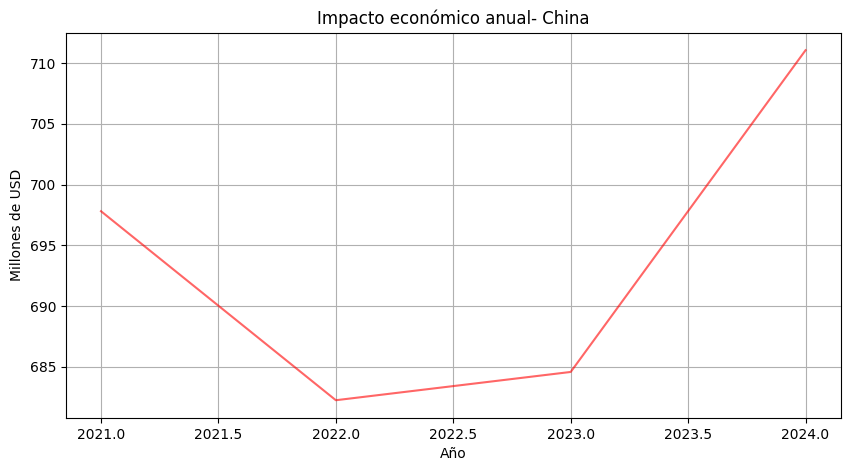

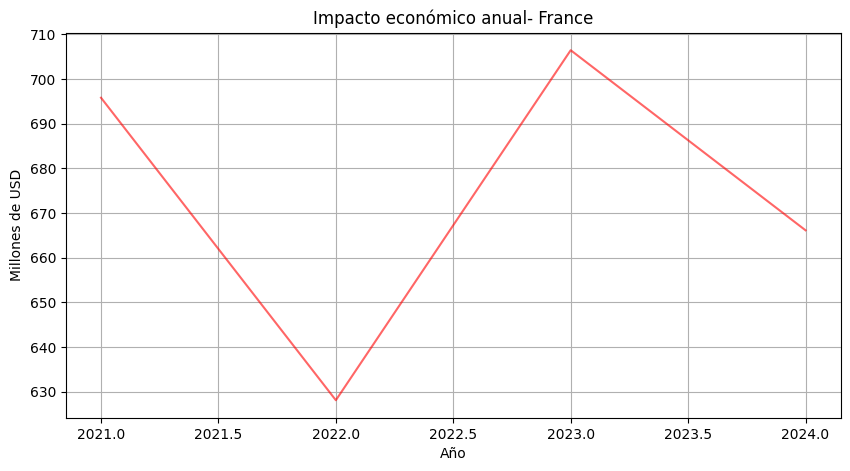

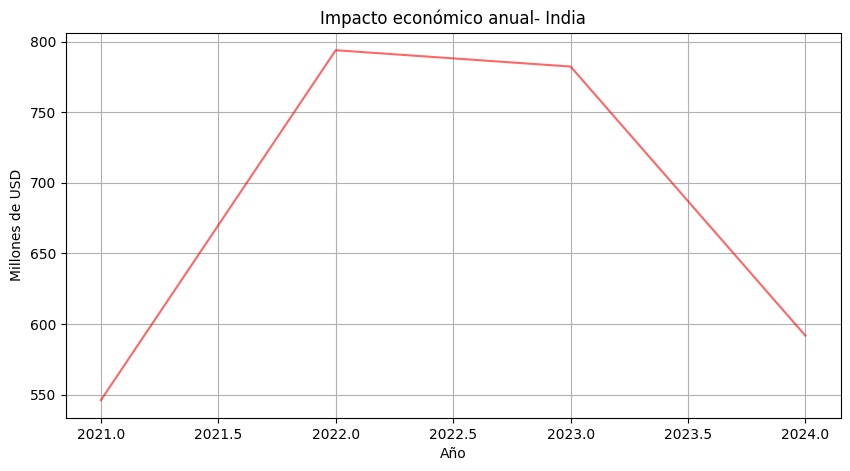

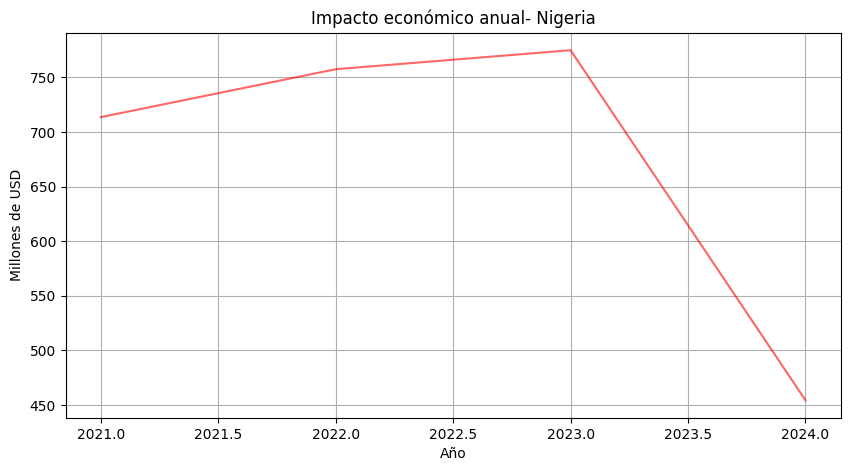

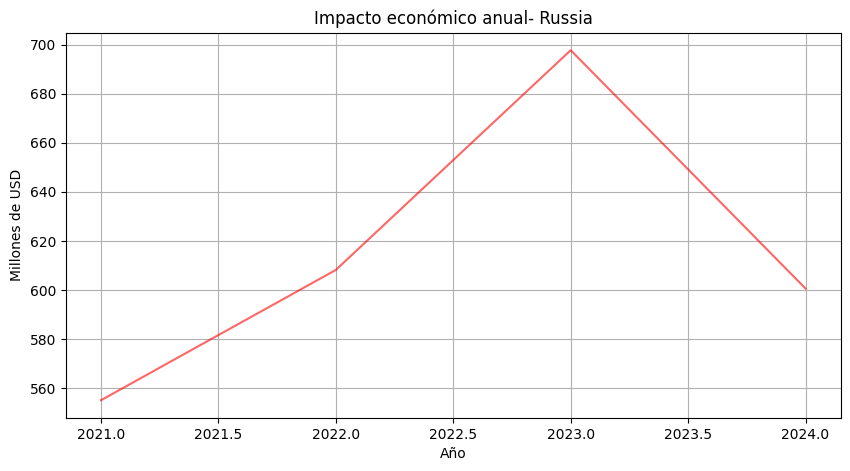

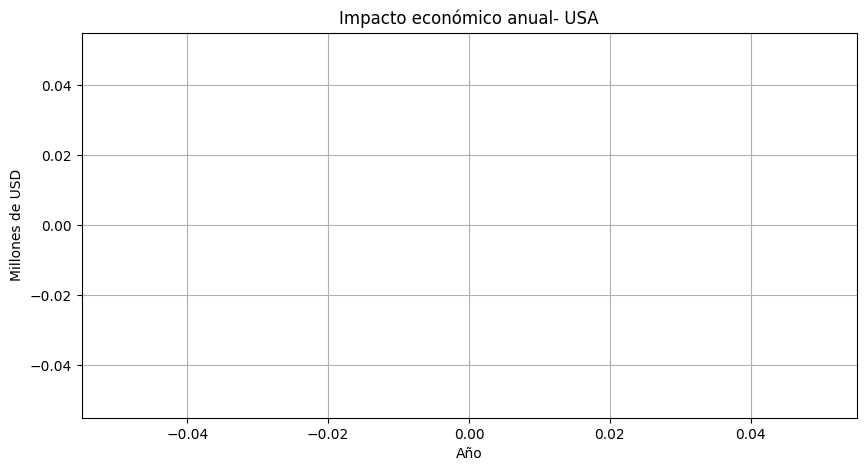

In [23]:
paises = {
    'Argentina': df_Arg,
    'Australia': df_Aust,
    'Brazil': df_Bra,
    'Canada': df_Can,
    'China': df_Ch,
    'France': df_Fra,
    'India': df_Ind,
    'Nigeria': df_Ni,
    'Russia': df_Ru,
    'USA': df_Us
}
plt.figure(figsize=(12, 6))

for pais, data in paises.items():
    pre_mean = data.groupby('year')['economic_impact_million_usd'].mean().reset_index()
    
    plt.figure(figsize=(10,5))
    plt.plot(pre_mean['year'], pre_mean['economic_impact_million_usd'], alpha=0.6, color='red')
    plt.title(f'Impacto económico anual- {pais}')
    plt.xlabel('Año')
    plt.ylabel('Millones de USD')
    plt.grid(True)
    plt.show()